In [36]:
import uproot
print("uproot version: ", uproot.__version__)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
import pickle
from collections import Counter
from particle import Particle

import awkward as ak

uproot version:  5.6.2


# Initialize Files and Variables

In [37]:
#f = uproot.open("/Users/katherinepulido/Desktop/next_gen_photon_epem/data_files/SURPRISE_Test_Samples_v10_04_07_05_Run4b_super_unified_reco2_BNB_nu_NC_pi0_overlay_reco2_hist.root")
f2 = uproot.open('/Users/katherinepulido/Desktop/MCC9.10_Test_Samples_v10_04_07_04_Run4b_super_unified_reco2_BNB_nu_NC_pi0_overlay_reco2_hist.root')

In [38]:
#f["wcpselection"]['T_PFeval'].items()
#f["wcpselection"]['T_eval'].items()

f2["nuselection"]["NeutrinoSelectionFilter"].keys()

['selected',
 'run',
 'sub',
 'evt',
 'trk_id',
 'shr_id',
 'trk2_id',
 'shr2_id',
 'trk3_id',
 'shr3_id',
 'shr_energy_tot',
 'shr_energy',
 'shr_energy_second',
 'shr_energy_third',
 'shr_energy_tot_cali',
 'shr_energy_cali',
 'shr_energy_second_cali',
 'shr_energy_third_cali',
 'shr_theta',
 'shr_phi',
 'shr_pca_0',
 'shr_pca_1',
 'shr_pca_2',
 'shr_px',
 'shr_py',
 'shr_pz',
 'shr_openangle',
 'shr_tkfit_start_x',
 'shr_tkfit_start_y',
 'shr_tkfit_start_z',
 'shr_tkfit_theta',
 'shr_tkfit_phi',
 'shr_start_x',
 'shr_start_y',
 'shr_start_z',
 'shr_dedx_Y',
 'shr_dedx_V',
 'shr_dedx_U',
 'shr_dedx_Y_cali',
 'shr_dedx_V_cali',
 'shr_dedx_U_cali',
 'shr_tkfit_dedx_Y',
 'shr_tkfit_dedx_V',
 'shr_tkfit_dedx_U',
 'shr_tkfit_dedx_max',
 'shr_tkfit_nhits_Y',
 'shr_tkfit_nhits_V',
 'shr_tkfit_nhits_U',
 'shr_llrpid_dedx_Y',
 'shr_llrpid_dedx_V',
 'shr_llrpid_dedx_U',
 'shr_llrpid_dedx',
 'shr_tkfit_dedx_Y_alt',
 'shr_tkfit_dedx_V_alt',
 'shr_tkfit_dedx_U_alt',
 'shr_tkfit_nhits_Y_alt',
 'sh

## full event displays

def show_simplified_event_display(one_event_df, view="zy", index=0, zoomed=False):
    file = one_event_df["file"].to_numpy()[index]
    run = one_event_df["run"].to_numpy()[index]
    #print(run)
    subrun = one_event_df["subrun"].to_numpy()[index]
    event = one_event_df["event"].to_numpy()[index]

    reco_ids = one_event_df["reco_id"].to_numpy()[index]
    reco_pdgs = one_event_df["reco_pdg"].to_numpy()[index]
    reco_start_XYZTs = one_event_df["reco_startXYZT"].to_numpy()[index]
    reco_end_XYZTs = one_event_df["reco_endXYZT"].to_numpy()[index]

    truth_ids = one_event_df["truth_id"].to_numpy()[index]
    truth_pdgs = one_event_df["truth_pdg"].to_numpy()[index]
    truth_start_XYZTs = one_event_df["truth_startXYZT"].to_numpy()[index]
    truth_end_XYZTs = one_event_df["truth_endXYZT"].to_numpy()[index]

    tpc_min_x = -1.
    tpc_max_x = 254.3
    tpc_min_y = -115.
    tpc_max_y = 117.
    tpc_min_z = 0.6
    tpc_max_z = 1036.4

    plt.rcParams.update({'font.size': 14})

    plt.figure(figsize=(14, 6))
    if view == "zy":
        plt.plot([tpc_min_z, tpc_max_z], [tpc_min_y, tpc_min_y], c="k")
        plt.plot([tpc_min_z, tpc_max_z], [tpc_max_y, tpc_max_y], c="k")
        plt.plot([tpc_min_z, tpc_min_z], [tpc_min_y, tpc_max_y], c="k")
        plt.plot([tpc_max_z, tpc_max_z], [tpc_min_y, tpc_max_y], c="k")
    elif view =="zx":
        plt.plot([tpc_min_z, tpc_max_z], [tpc_min_x, tpc_min_x], c="k")
        plt.plot([tpc_min_z, tpc_max_z], [tpc_max_x, tpc_max_x], c="k")
        plt.plot([tpc_min_z, tpc_min_z], [tpc_min_x, tpc_max_x], c="k")
        plt.plot([tpc_max_z, tpc_max_z], [tpc_min_x, tpc_max_x], c="k")
    elif view == "xy":
        plt.plot([tpc_min_x, tpc_max_x], [tpc_min_y, tpc_min_y], c="k")
        plt.plot([tpc_min_x, tpc_max_x], [tpc_max_y, tpc_max_y], c="k")
        plt.plot([tpc_min_x, tpc_min_x], [tpc_min_y, tpc_max_y], c="k")
        plt.plot([tpc_max_x, tpc_max_x], [tpc_min_y, tpc_max_y], c="k")
    plt.plot([], [], c="r", label="Reco")
    plt.plot([], [], c="b", label="True")
    for j in range(len(reco_pdgs)):
        start_x, start_y, start_z, start_t = reco_start_XYZTs[j]
        end_x, end_y, end_z, end_t = reco_end_XYZTs[j]
        if view == "zy":
            start = np.array([start_z, start_y])
            end = np.array([end_z, end_y])
        elif view == "zx":
            start = np.array([start_z, start_x])
            end = np.array([end_z, end_x])
        elif view == "xy":
            start = np.array([start_x, start_y])
            end = np.array([end_x, end_y])
        pdg = reco_pdgs[j]
        if Particle.from_pdgid(pdg).charge == 0: # invisible particle, draw dashed line
            plt.plot([start[0], end[0]], [start[1], end[1]], c="r", linestyle="--", lw=0.5)
        elif pdg == 11: # shower, plot cone
        #elif pdg == 22:
            direction = end - start
            length = np.linalg.norm(direction)
            unit_direction = direction / length
            perp = np.array([-unit_direction[1], unit_direction[0]])
            angle_rad = np.radians(20 / 2)
            side_length = length * np.tan(angle_rad)
            side1 = end - side_length * perp
            side2 = end + side_length * perp
            triangle = np.array([start, side1, end, side2])
            plt.fill(triangle[:, 0], triangle[:, 1], color="r", alpha=0.5)
        else: # track, plot line
            plt.plot([start[0], end[0]], [start[1], end[1]], c="r")

    for j in range(len(truth_pdgs)):
        start_x, start_y, start_z, start_t = truth_start_XYZTs[j]
        end_x, end_y, end_z, end_t = truth_end_XYZTs[j]
        start_x = np.clip(start_x, tpc_min_x, tpc_max_x)
        start_y = np.clip(start_y, tpc_min_y, tpc_max_y)
        start_z = np.clip(start_z, tpc_min_z, tpc_max_z)
        end_x = np.clip(end_x, tpc_min_x, tpc_max_x)
        end_y = np.clip(end_y, tpc_min_y, tpc_max_y)
        end_z = np.clip(end_z, tpc_min_z, tpc_max_z)
        if view == "zy":
            start = np.array([start_z, start_y])
            end = np.array([end_z, end_y])
        elif view == "zx":
            start = np.array([start_z, start_x])
            end = np.array([end_z, end_x])
        elif view == "xy":
            start = np.array([start_x, start_y])
            end = np.array([end_x, end_y])
        pdg = truth_pdgs[j]
        if Particle.from_pdgid(pdg).charge == 0: # invisible particle, draw dashed line
            plt.plot([start[0], end[0]], [start[1], end[1]], c="b", linestyle="--", lw=0.5)
        elif pdg == 11: # shower, plot cone
        #elif pdg == 22:
        #elif pdg == -11:
            direction = end - start
            length = np.linalg.norm(direction)
            unit_direction = direction / length
            perp = np.array([-unit_direction[1], unit_direction[0]])
            angle_rad = np.radians(20 / 2)
            side_length = length * np.tan(angle_rad)
            side1 = end - side_length * perp
            side2 = end + side_length * perp
            triangle = np.array([start, side1, end, side2])
            #print(truth_mother[index][j])
            pdg_index = np.where(truth_ids == truth_mother[index][j])
            mother_of_mother = np.where(truth_ids == truth_mother[index][pdg_index])
            #print(pdg_index)
            print(truth_pdg[index][pdg_index])
            print(f'mother of mother: {truth_pdg[index][mother_of_mother]}')
            plt.fill(triangle[:, 0], triangle[:, 1], color="b", alpha=0.5)
        else: # track, plot line
            plt.plot([start[0], end[0]], [start[1], end[1]], c="b")

    if view == "zy":
        plt.scatter(one_event_df["reco_nuvtxZ"].to_numpy()[index], one_event_df["reco_nuvtxY"].to_numpy()[index], color="r", marker="*", s=100)
        #plt.scatter(160, 55, color="r", marker="*", s=200)
        plt.scatter(one_event_df["truth_vtxZ"].to_numpy()[index], one_event_df["truth_vtxY"].to_numpy()[index], color="b", marker="*", s=100)# shower vertex location
        plt.scatter(one_event_df["reco_showervtxZ"].to_numpy()[index], one_event_df["reco_showervtxY"].to_numpy()[index], color="r", marker="P", s=100)
        plt.scatter(one_event_df["truth_corr_showervtxZ"].to_numpy()[index], one_event_df["truth_corr_showervtxY"].to_numpy()[index], color="b", marker="P", s=100)
  
    elif view == "zx":
        plt.scatter(one_event_df["reco_nuvtxZ"].to_numpy()[index], one_event_df["reco_nuvtxX"].to_numpy()[index], color="r", marker="*", s=100)
        plt.scatter(one_event_df["truth_vtxZ"].to_numpy()[index], one_event_df["truth_vtxX"].to_numpy()[index], color="b", marker="*", s=100)
    elif view == "xy":
        plt.scatter(one_event_df["reco_nuvtxX"].to_numpy()[index], one_event_df["reco_nuvtxY"].to_numpy()[index], color="r", marker="*", s=100)
        plt.scatter(one_event_df["truth_vtxX"].to_numpy()[index], one_event_df["truth_vtxY"].to_numpy()[index], color="b", marker="*", s=100)
    plt.title(f"{file}, RSE {run} {subrun} {event}")
    plt.legend(loc="upper right")
    if view == "zy":
        plt.xlabel("Z (cm)")
        plt.ylabel("Y (cm)")
    elif view == "zx":
        plt.xlabel("Z (cm)")
        plt.ylabel("X (cm)")
    elif view == "xy":
        plt.xlabel("X (cm)")
        plt.ylabel("Y (cm)")
    if zoomed and view == "zy":
        plt.xlim(one_event_df["reco_nuvtxZ"].to_numpy()[index]-100, one_event_df["reco_nuvtxZ"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxY"].to_numpy()[index]-100, one_event_df["reco_nuvtxY"].to_numpy()[index]+100)
    elif zoomed and view == "zx":
        plt.xlim(one_event_df["reco_nuvtxZ"].to_numpy()[index]-100, one_event_df["reco_nuvtxZ"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxX"].to_numpy()[index]-100, one_event_df["reco_nuvtxX"].to_numpy()[index]+100)
    elif zoomed and view == "xy":
        plt.xlim(one_event_df["reco_nuvtxX"].to_numpy()[index]-100, one_event_df["reco_nuvtxX"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxY"].to_numpy()[index]-100, one_event_df["reco_nuvtxY"].to_numpy()[index]+100)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def go(i):
    show_simplified_event_display(nu_overlay_df, view="zy", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="zy", index=i, zoomed=True)
    show_simplified_event_display(nu_overlay_df, view="zx", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="zx", index=i, zoomed=True)

    show_simplified_event_display(nu_overlay_df, view="xy", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="xy", index=i, zoomed=True)

go(122)

In [39]:
T_bdt_vars = [              # variables involved with BDT training (if you want to train your own BDT, lots of these variables will be useful)
                            # many of these variables describe specific features of the WC spacepoints using this code: https://github.com/BNLIF/wire-cell-pid/blob/master/src/NeutrinoID_nue_tagger.h
    'single_photon_ncpi0_score',                        # here, we just include higher level outputs:
    "nue_score",                    # BDT score for nue selection, used for the WC inclusive nueCC analysis
    "numu_score",                   # BDT score for numu selection, used for the WC inclusive numuCC selections
    "nc_delta_score",               # BDT score for NC Delta selection
    "nc_pio_score",                 # BDT score for NC pi0 selection
    "numu_cc_flag",                 # flag, -1 means not generic selected, 0 means generic selected, 1 means cut-based numuCC selected. We often use "numu_cc_flag >= 0" to apply generic neutrino selection.
]

T_eval_vars = [             # variables involved with low level reconstruction and truth information
    "run",                         # run number
    "subrun",                       # subrun number
    "event",                        # event number
    "match_isFC",                   # reconstructed cluster is fully contained (FC), boolean
    "truth_nuEnergy",               # true neutrino energy (MeV)
    "truth_nuPdg",                  # true neutrino pdg code
    "truth_isCC",                   # true interaction type is charged current, boolean
    "match_completeness_energy",    # the true energy deposited in the clusters that are 3D-matched with the reconstructed neutrino clusters (MeV)
    "truth_energyInside",           # the true energy deposited in the TPC Fiducial Volume (MeV)
    "truth_vtxInside",              # boolean, true neutrino vertex is inside the TPC Fiducial Volume
    "truth_vtxX",                   # true neutrino vertex x (cm)
    "truth_vtxY",                   # true neutrino vertex y (cm)
    "truth_vtxZ",                   # true neutrino vertex z (cm)
    "weight_cv",                    # GENIE MicroBooNE tune event weight (which should be corrected by also using weight_spline)
    "weight_spline",                # additional weight to correct the GENIE tune for certain events
]
T_eval_data_vars = [        # same as above, but for data files we do not attempt to load any truth information
    "run",
    "subrun",
    "event",
    "match_isFC",
]

T_kine_vars = [             # variables involved with kinematic reconstruction
    "kine_reco_Enu",                # reconstructed neutrino energy (MeV). "kine_reco_Enu > 0" is another way to apply generic neutrino selection.
    "kine_energy_particle",         # energy of each reco particle
    "kine_particle_type", # pdg code of each reco particle
    "kine_pio_mass",
    "kine_pio_energy_2",
    "kine_pio_flag"
]

T_pf_vars = [               # variables involved with individual particles
    "truth_NprimPio",
    "truth_NCDelta",
    "reco_nuvtxX",
    "reco_nuvtxY",
    "reco_nuvtxZ",
    "reco_muonMomentum",            # reconstructed muon momentum 4-vector (p_x, p_y, p_z, p_t), in (GeV/c, GeV/c, GeV/c, GeV)
    "reco_showerMomentum",          # reconstructed primary shower momentum 4-vector (p_x, p_y, p_z, p_t), in (GeV/c, GeV/c, GeV/c, GeV)
    "reco_showervtxX",
    "reco_showervtxY",
    "reco_showervtxZ",

    # truth shower = xyz ke

    'truth_corr_showervtxX', 
    'truth_corr_showervtxY', 
    'truth_corr_showervtxZ', 
    'truth_showerKE',

    # These variables are related to individual true particles
    "truth_Ntrack",
    "truth_id",
    "truth_pdg",
    "truth_mother",
    "truth_startMomentum",
    "truth_startXYZT",
    "truth_endXYZT",

    # These variables are related to individual reco particles
    "reco_Ntrack",
    "reco_id",
    "reco_pdg",
    "reco_mother",
    "reco_startMomentum",
    "reco_startXYZT",
    "reco_endXYZT",
]

T_pf_data_vars = [          # same as above, but for data files we do not attempt to load any truth information
    "reco_nuvtxX",
    "reco_nuvtxY",
    "reco_nuvtxZ",
    "reco_muonMomentum",
    "reco_showerMomentum",
    "reco_showervtxX",
    "reco_showervtxY",
    "reco_showervtxZ",
    "reco_Ntrack",
    "reco_id",
    "reco_pdg",
    "reco_mother",
    "reco_startMomentum",
    "reco_startXYZT",
    "reco_endXYZT",
    'kine_reco_Enu'
]



vars = {}
vars.update(f2["wcpselection"]["T_BDTvars"].arrays(T_bdt_vars, library="np"))
vars.update(f2["wcpselection"]["T_eval"].arrays(T_eval_vars, library="np"))
vars.update(f2["wcpselection"]["T_KINEvars"].arrays(T_kine_vars, library="np"))
vars.update(f2["wcpselection"]["T_PFeval"].arrays(T_pf_vars, library="np"))

vars.update(f2["wcpselection"]["T_BDTvars"]['shw_sp_n_20mev_showers'].arrays(library="np"))
vars.update(f2["wcpselection"]["T_BDTvars"]['shw_sp_20mev_showers'].arrays(library="np"))

file_POT = np.sum(f2["wcpselection"]["T_pot"].arrays("pot_tor875good", library="np")["pot_tor875good"])
for col in vars:
    vars[col] = vars[col].tolist()
wc_df = pd.DataFrame(vars)

nu_overlay_df = pd.DataFrame(vars)
nu_overlay_df["file"] = "nu_overlay"

#nu_overlay_df

#wc_df


print(nu_overlay_df.columns)

Index(['single_photon_ncpi0_score', 'nue_score', 'numu_score',
       'nc_delta_score', 'nc_pio_score', 'numu_cc_flag', 'run', 'subrun',
       'event', 'match_isFC', 'truth_nuEnergy', 'truth_nuPdg', 'truth_isCC',
       'match_completeness_energy', 'truth_energyInside', 'truth_vtxInside',
       'truth_vtxX', 'truth_vtxY', 'truth_vtxZ', 'weight_cv', 'weight_spline',
       'kine_reco_Enu', 'kine_energy_particle', 'kine_particle_type',
       'kine_pio_mass', 'kine_pio_energy_2', 'kine_pio_flag', 'truth_NprimPio',
       'truth_NCDelta', 'reco_nuvtxX', 'reco_nuvtxY', 'reco_nuvtxZ',
       'reco_muonMomentum', 'reco_showerMomentum', 'reco_showervtxX',
       'reco_showervtxY', 'reco_showervtxZ', 'truth_corr_showervtxX',
       'truth_corr_showervtxY', 'truth_corr_showervtxZ', 'truth_showerKE',
       'truth_Ntrack', 'truth_id', 'truth_pdg', 'truth_mother',
       'truth_startMomentum', 'truth_startXYZT', 'truth_endXYZT',
       'reco_Ntrack', 'reco_id', 'reco_pdg', 'reco_mother',
      

In [40]:
reco_pdgs = wc_df["reco_pdg"].to_numpy()
reco_energy = wc_df["reco_startMomentum"].to_numpy()
kine_reco_Enu = wc_df["kine_reco_Enu"].to_numpy()
reco_mothers = wc_df["reco_mother"].to_numpy()
reco_ids = wc_df["reco_id"].to_numpy()

reco_shower_counts = []
reco_electron_counts = []
reco_photon_counts = []

for i in tqdm(range(len(reco_pdgs))):

    curr_reco_pdgs = reco_pdgs[i]
    curr_reco_energy = reco_energy[i]
    curr_reco_pdgs = reco_pdgs[i]
    curr_reco_energy = reco_energy[i]
    curr_reco_shower_count = 0
    curr_reco_electron_count = 0
    curr_reco_photon_count = 0

    electron_count = 0
    photon_count = 0
    shower_count = 0
    
    if len(curr_reco_pdgs) == 0:
        reco_electron_counts.append(-999)
        reco_photon_counts.append(-999)
        reco_shower_counts.append(-999)
        continue

    for j in range(len(curr_reco_pdgs)):
        pdg = curr_reco_pdgs[j]
        if pdg == 22: # photon
            if curr_reco_energy[j][3] > .02:
                curr_reco_photon_count += 1
        if pdg == 11: # electron
            if curr_reco_energy[j][3] > .02:
                curr_reco_electron_count += 1
        if pdg == 22 or pdg == 11: # shower
            if curr_reco_energy[j][3] > .02:
                curr_reco_shower_count += 1

    reco_shower_counts.append(curr_reco_shower_count)
    reco_electron_counts.append(curr_reco_electron_count)
    reco_photon_counts.append(curr_reco_photon_count)

# Assign back to DataFrame
wc_df["reco_20MeV_showers"] = reco_shower_counts
wc_df["reco_20MeV_electrons"] = reco_electron_counts
wc_df["reco_20MeV_photons"] = reco_photon_counts




  0%|          | 0/11935 [00:00<?, ?it/s]

# Separate Initializations for Reco and Truth

In [41]:
# reco

reco_pdgs = wc_df["reco_pdg"].to_numpy()
reco_energy = wc_df["reco_startMomentum"].to_numpy()

truth_mothers = wc_df["truth_mother"].to_numpy()
reco_mothers = wc_df["reco_mother"].to_numpy()

reco_shower_counts = []
reco_electron_counts = []
reco_photon_counts = []

success_list = []

reco_signals = []

for i in tqdm(range(len(reco_pdgs))):

    curr_reco_pdgs = reco_pdgs[i]
    curr_reco_energy = reco_energy[i]
    curr_reco_photon_count = 0
    reco_ids = wc_df["reco_id"].to_numpy()[i]
    
    curr_truth_mothers = truth_mothers[i]
    curr_reco_mothers = reco_mothers[i]
    
    success = -999
    
    if kine_reco_Enu[i] > .02:
        success = 1


    if len(curr_reco_pdgs) == 0:
        success_list.append(success)
        reco_photon_counts.append(-999)
        continue

    for j in range(len(curr_reco_pdgs)):
        pdg = curr_reco_pdgs[j]
        if pdg == 22: # photon
            if curr_reco_energy[j][3] > .02:
                curr_reco_photon_count += 1
            mother_index = np.where(reco_ids == curr_reco_mothers[j])[0]
            if mother_index.size == 0:
                continue
            mother_pdg = curr_reco_pdgs[mother_index]
            if np.any(mother_pdg == 111):
                success = 2

    success_list.append(success)
    reco_photon_counts.append(curr_reco_photon_count)
    

#print(reco_shower_counts)

wc_df["reco_20MeV_photons"] = reco_photon_counts

wc_df["success_num"] = success_list

print(len(success_list))



  0%|          | 0/11935 [00:00<?, ?it/s]

11935


In [42]:
# truth

truth_pdgs = wc_df["truth_pdg"].to_numpy()
truth_energy = wc_df["truth_startMomentum"].to_numpy()

truth_mothers = wc_df["truth_mother"].to_numpy()

truth_shower_counts = []
truth_electron_counts = []
truth_photon_counts = []

truth_signals = []

for i in tqdm(range(len(truth_pdgs))):

    curr_truth_pdgs = truth_pdgs[i]
    curr_truth_energy = truth_energy[i]
    curr_truth_photon_count = 0
    truth_ids = wc_df["truth_id"].to_numpy()[i]
    
    curr_truth_mothers = truth_mothers[i]
    
    if len(curr_truth_pdgs) == 0:
        truth_photon_counts.append(-999)
        continue

    for j in range(len(curr_truth_pdgs)):
        pdg = curr_truth_pdgs[j]
        if pdg == 22: # photon
            if curr_truth_energy[j][3] < .02:
                curr_truth_photon_count += 1
                
    truth_photon_counts.append(curr_truth_photon_count)

#print(reco_shower_counts)

wc_df["truth_20MeV_photons"] = truth_photon_counts

print(len(success_list))



  0%|          | 0/11935 [00:00<?, ?it/s]

11935


# Event Display

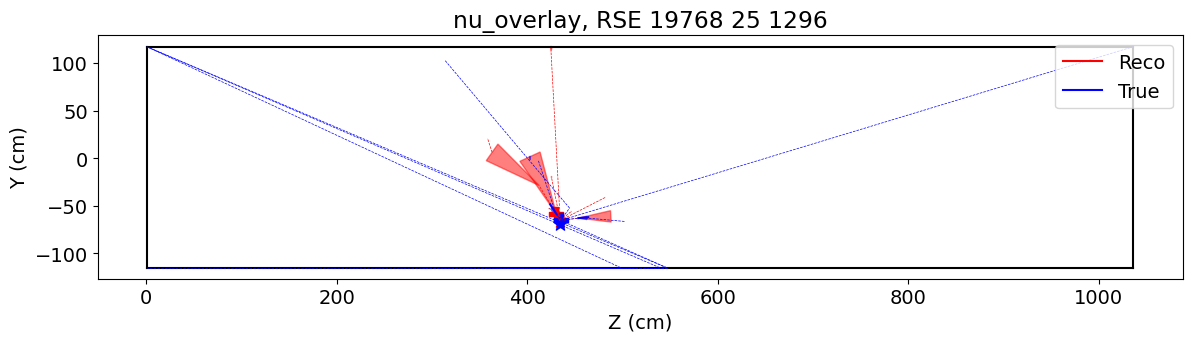

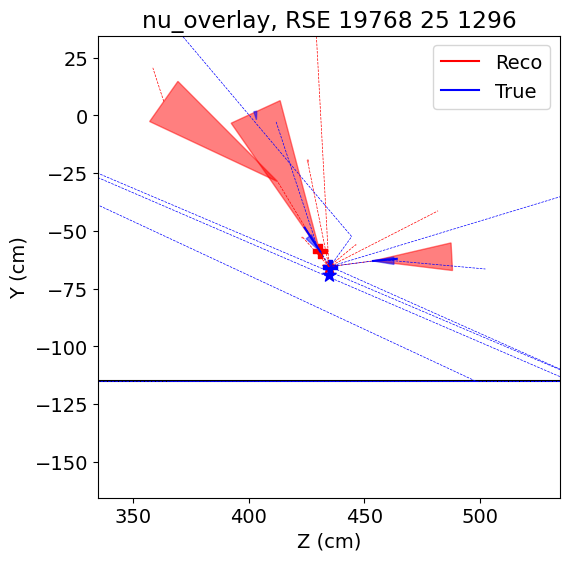

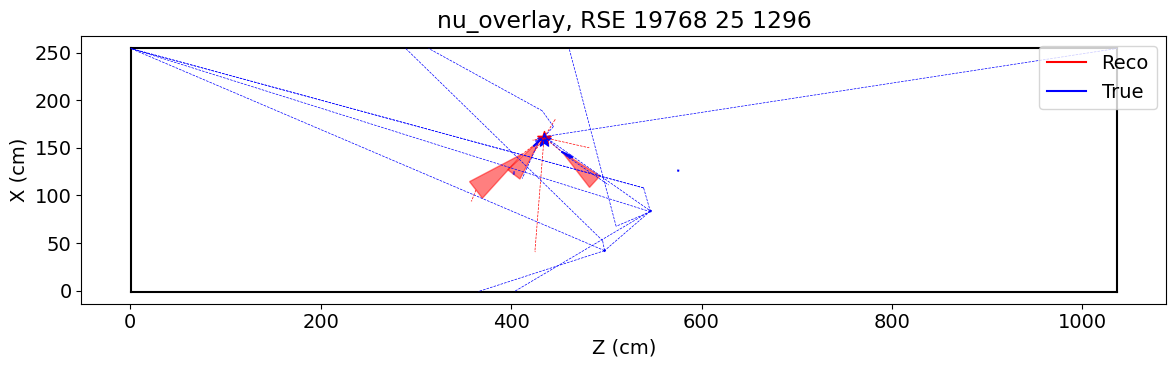

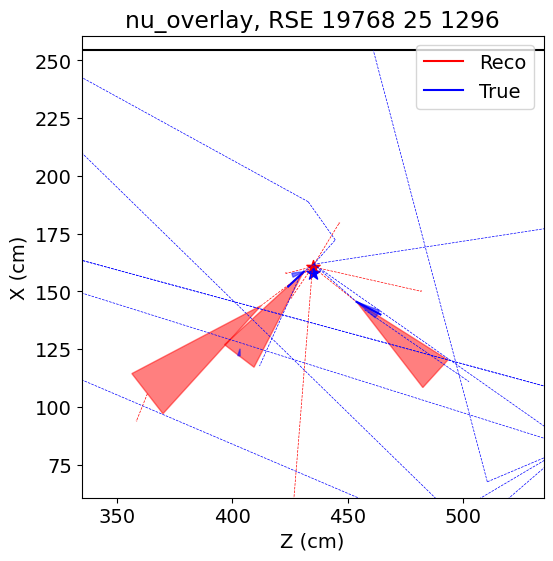

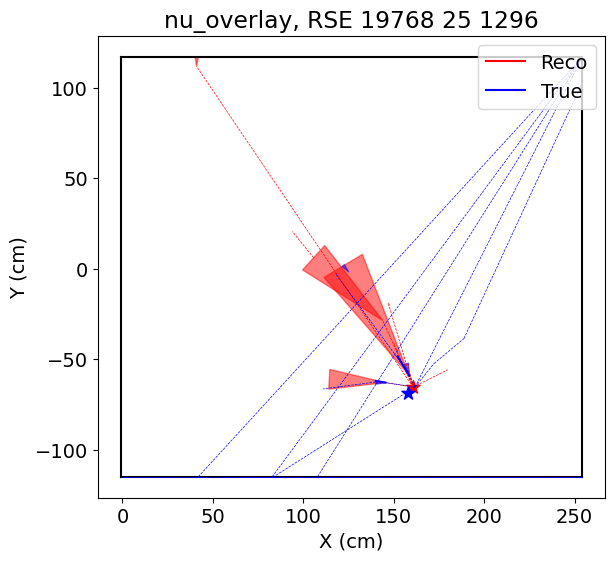

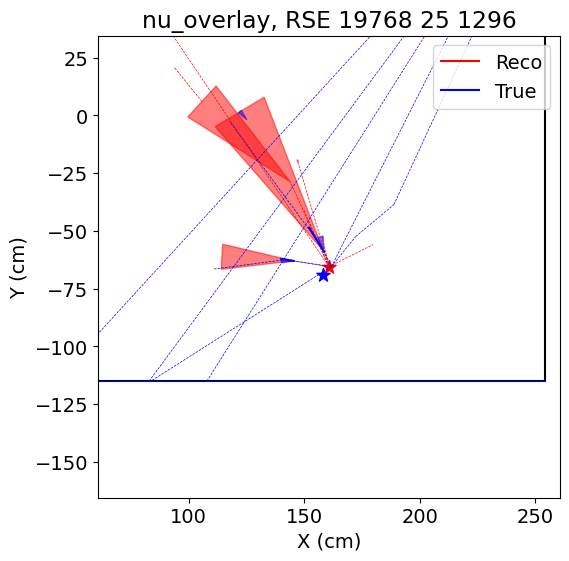

In [43]:
# full event display

def show_simplified_event_display(one_event_df, view="zy", index=0, zoomed=False):
    file = one_event_df["file"].to_numpy()[index]
    run = one_event_df["run"].to_numpy()[index]
    #print(run)
    subrun = one_event_df["subrun"].to_numpy()[index]
    event = one_event_df["event"].to_numpy()[index]

    reco_ids = one_event_df["reco_id"].to_numpy()[index]
    reco_pdgs = one_event_df["reco_pdg"].to_numpy()[index]
    reco_start_XYZTs = one_event_df["reco_startXYZT"].to_numpy()[index]
    reco_end_XYZTs = one_event_df["reco_endXYZT"].to_numpy()[index]

    truth_ids = one_event_df["truth_id"].to_numpy()[index]
    truth_pdgs = one_event_df["truth_pdg"].to_numpy()[index]
    truth_start_XYZTs = one_event_df["truth_startXYZT"].to_numpy()[index]
    truth_end_XYZTs = one_event_df["truth_endXYZT"].to_numpy()[index]

    tpc_min_x = -1.
    tpc_max_x = 254.3
    tpc_min_y = -115.
    tpc_max_y = 117.
    tpc_min_z = 0.6
    tpc_max_z = 1036.4

    plt.rcParams.update({'font.size': 14})

    plt.figure(figsize=(14, 6))
    if view == "zy":
        plt.plot([tpc_min_z, tpc_max_z], [tpc_min_y, tpc_min_y], c="k")
        plt.plot([tpc_min_z, tpc_max_z], [tpc_max_y, tpc_max_y], c="k")
        plt.plot([tpc_min_z, tpc_min_z], [tpc_min_y, tpc_max_y], c="k")
        plt.plot([tpc_max_z, tpc_max_z], [tpc_min_y, tpc_max_y], c="k")
    elif view =="zx":
        plt.plot([tpc_min_z, tpc_max_z], [tpc_min_x, tpc_min_x], c="k")
        plt.plot([tpc_min_z, tpc_max_z], [tpc_max_x, tpc_max_x], c="k")
        plt.plot([tpc_min_z, tpc_min_z], [tpc_min_x, tpc_max_x], c="k")
        plt.plot([tpc_max_z, tpc_max_z], [tpc_min_x, tpc_max_x], c="k")
    elif view == "xy":
        plt.plot([tpc_min_x, tpc_max_x], [tpc_min_y, tpc_min_y], c="k")
        plt.plot([tpc_min_x, tpc_max_x], [tpc_max_y, tpc_max_y], c="k")
        plt.plot([tpc_min_x, tpc_min_x], [tpc_min_y, tpc_max_y], c="k")
        plt.plot([tpc_max_x, tpc_max_x], [tpc_min_y, tpc_max_y], c="k")
    plt.plot([], [], c="r", label="Reco")
    plt.plot([], [], c="b", label="True")
    for j in range(len(reco_pdgs)):
        start_x, start_y, start_z, start_t = reco_start_XYZTs[j]
        end_x, end_y, end_z, end_t = reco_end_XYZTs[j]
        if view == "zy":
            start = np.array([start_z, start_y])
            end = np.array([end_z, end_y])
        elif view == "zx":
            start = np.array([start_z, start_x])
            end = np.array([end_z, end_x])
        elif view == "xy":
            start = np.array([start_x, start_y])
            end = np.array([end_x, end_y])
        pdg = reco_pdgs[j]
        if Particle.from_pdgid(pdg).charge == 0: # invisible particle, draw dashed line
            plt.plot([start[0], end[0]], [start[1], end[1]], c="r", linestyle="--", lw=0.5)
        elif pdg == 11: # shower, plot cone
        #elif pdg == 22:
            direction = end - start
            length = np.linalg.norm(direction)
            unit_direction = direction / length
            perp = np.array([-unit_direction[1], unit_direction[0]])
            angle_rad = np.radians(20 / 2)
            side_length = length * np.tan(angle_rad)
            side1 = end - side_length * perp
            side2 = end + side_length * perp
            triangle = np.array([start, side1, end, side2])
            plt.fill(triangle[:, 0], triangle[:, 1], color="r", alpha=0.5)
        else: # track, plot line
            plt.plot([start[0], end[0]], [start[1], end[1]], c="r")

    for j in range(len(truth_pdgs)):
        start_x, start_y, start_z, start_t = truth_start_XYZTs[j]
        end_x, end_y, end_z, end_t = truth_end_XYZTs[j]
        start_x = np.clip(start_x, tpc_min_x, tpc_max_x)
        start_y = np.clip(start_y, tpc_min_y, tpc_max_y)
        start_z = np.clip(start_z, tpc_min_z, tpc_max_z)
        end_x = np.clip(end_x, tpc_min_x, tpc_max_x)
        end_y = np.clip(end_y, tpc_min_y, tpc_max_y)
        end_z = np.clip(end_z, tpc_min_z, tpc_max_z)
        if view == "zy":
            start = np.array([start_z, start_y])
            end = np.array([end_z, end_y])
        elif view == "zx":
            start = np.array([start_z, start_x])
            end = np.array([end_z, end_x])
        elif view == "xy":
            start = np.array([start_x, start_y])
            end = np.array([end_x, end_y])
        pdg = truth_pdgs[j]
        if Particle.from_pdgid(pdg).charge == 0: # invisible particle, draw dashed line
            plt.plot([start[0], end[0]], [start[1], end[1]], c="b", linestyle="--", lw=0.5)
        elif pdg == 11: # shower, plot cone
        #elif pdg == 22:
        #elif pdg == -11:
            direction = end - start
            length = np.linalg.norm(direction)
            unit_direction = direction / length
            perp = np.array([-unit_direction[1], unit_direction[0]])
            angle_rad = np.radians(20 / 2)
            side_length = length * np.tan(angle_rad)
            side1 = end - side_length * perp
            side2 = end + side_length * perp
            triangle = np.array([start, side1, end, side2])
            #print(truth_mother[index][j])
            pdg_index = np.where(truth_ids == wc_df["truth_mother"][index][j])
            mother_of_mother = np.where(truth_ids == wc_df["truth_mother"][index][pdg_index])
            #print(pdg_index)
            #print(wc_df["truth_pdg"][index][pdg_index])
            #print(f'mother of mother: {wc_df["truth_pdg"][index][mother_of_mother]}')
            plt.fill(triangle[:, 0], triangle[:, 1], color="b", alpha=0.5)
        else: # track, plot line
            plt.plot([start[0], end[0]], [start[1], end[1]], c="b")

    if view == "zy":
        plt.scatter(one_event_df["reco_nuvtxZ"].to_numpy()[index], one_event_df["reco_nuvtxY"].to_numpy()[index], color="r", marker="*", s=100)
        #plt.scatter(160, 55, color="r", marker="*", s=200)
        plt.scatter(one_event_df["truth_vtxZ"].to_numpy()[index], one_event_df["truth_vtxY"].to_numpy()[index], color="b", marker="*", s=100)# shower vertex location
        plt.scatter(one_event_df["reco_showervtxZ"].to_numpy()[index], one_event_df["reco_showervtxY"].to_numpy()[index], color="r", marker="P", s=100)
        plt.scatter(one_event_df["truth_corr_showervtxZ"].to_numpy()[index], one_event_df["truth_corr_showervtxY"].to_numpy()[index], color="b", marker="P", s=100)
  
    elif view == "zx":
        plt.scatter(one_event_df["reco_nuvtxZ"].to_numpy()[index], one_event_df["reco_nuvtxX"].to_numpy()[index], color="r", marker="*", s=100)
        plt.scatter(one_event_df["truth_vtxZ"].to_numpy()[index], one_event_df["truth_vtxX"].to_numpy()[index], color="b", marker="*", s=100)
    elif view == "xy":
        plt.scatter(one_event_df["reco_nuvtxX"].to_numpy()[index], one_event_df["reco_nuvtxY"].to_numpy()[index], color="r", marker="*", s=100)
        plt.scatter(one_event_df["truth_vtxX"].to_numpy()[index], one_event_df["truth_vtxY"].to_numpy()[index], color="b", marker="*", s=100)
    plt.title(f"{file}, RSE {run} {subrun} {event}")
    plt.legend(loc="upper right")
    if view == "zy":
        plt.xlabel("Z (cm)")
        plt.ylabel("Y (cm)")
    elif view == "zx":
        plt.xlabel("Z (cm)")
        plt.ylabel("X (cm)")
    elif view == "xy":
        plt.xlabel("X (cm)")
        plt.ylabel("Y (cm)")
    if zoomed and view == "zy":
        plt.xlim(one_event_df["reco_nuvtxZ"].to_numpy()[index]-100, one_event_df["reco_nuvtxZ"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxY"].to_numpy()[index]-100, one_event_df["reco_nuvtxY"].to_numpy()[index]+100)
    elif zoomed and view == "zx":
        plt.xlim(one_event_df["reco_nuvtxZ"].to_numpy()[index]-100, one_event_df["reco_nuvtxZ"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxX"].to_numpy()[index]-100, one_event_df["reco_nuvtxX"].to_numpy()[index]+100)
    elif zoomed and view == "xy":
        plt.xlim(one_event_df["reco_nuvtxX"].to_numpy()[index]-100, one_event_df["reco_nuvtxX"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxY"].to_numpy()[index]-100, one_event_df["reco_nuvtxY"].to_numpy()[index]+100)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def go(i):
    show_simplified_event_display(nu_overlay_df, view="zy", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="zy", index=i, zoomed=True)
    show_simplified_event_display(nu_overlay_df, view="zx", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="zx", index=i, zoomed=True)

    show_simplified_event_display(nu_overlay_df, view="xy", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="xy", index=i, zoomed=True)

go(122)

NameError: name 'truth_pdg' is not defined

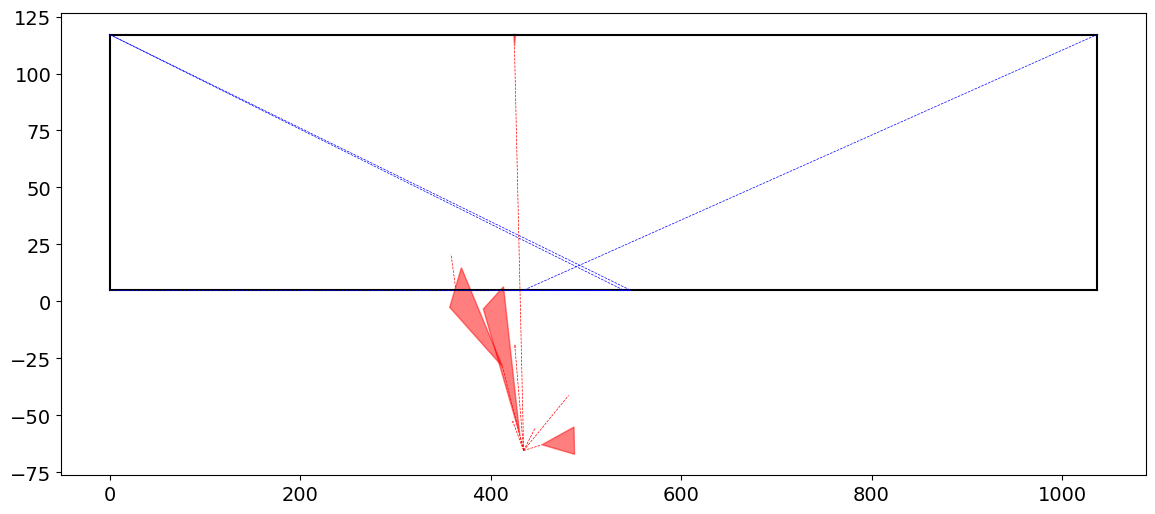

In [44]:
# full event displays

def show_simplified_event_display(one_event_df, view="zy", index=0, zoomed=False):
    file = one_event_df["file"].to_numpy()[index]
    run = one_event_df["run"].to_numpy()[index]
    #print(run)
    subrun = one_event_df["subrun"].to_numpy()[index]
    event = one_event_df["event"].to_numpy()[index]

    reco_ids = one_event_df["reco_id"].to_numpy()[index]
    reco_pdgs = one_event_df["reco_pdg"].to_numpy()[index]
    reco_start_XYZTs = one_event_df["reco_startXYZT"].to_numpy()[index]
    reco_end_XYZTs = one_event_df["reco_endXYZT"].to_numpy()[index]

    truth_ids = one_event_df["truth_id"].to_numpy()[index]
    truth_pdgs = one_event_df["truth_pdg"].to_numpy()[index]
    truth_start_XYZTs = one_event_df["truth_startXYZT"].to_numpy()[index]
    truth_end_XYZTs = one_event_df["truth_endXYZT"].to_numpy()[index]

    tpc_min_x = -1.
    tpc_max_x = 254.3
    tpc_min_y = 5.
    tpc_max_y = 117.
    tpc_min_z = 0.6
    tpc_max_z = 1036.4

    plt.rcParams.update({'font.size': 14})

    plt.figure(figsize=(14, 6))
    if view == "zy":
        plt.plot([tpc_min_z, tpc_max_z], [tpc_min_y, tpc_min_y], c="k")
        plt.plot([tpc_min_z, tpc_max_z], [tpc_max_y, tpc_max_y], c="k")
        plt.plot([tpc_min_z, tpc_min_z], [tpc_min_y, tpc_max_y], c="k")
        plt.plot([tpc_max_z, tpc_max_z], [tpc_min_y, tpc_max_y], c="k")
    elif view =="zx":
        plt.plot([tpc_min_z, tpc_max_z], [tpc_min_x, tpc_min_x], c="k")
        plt.plot([tpc_min_z, tpc_max_z], [tpc_max_x, tpc_max_x], c="k")
        plt.plot([tpc_min_z, tpc_min_z], [tpc_min_x, tpc_max_x], c="k")
        plt.plot([tpc_max_z, tpc_max_z], [tpc_min_x, tpc_max_x], c="k")
    elif view == "xy":
        plt.plot([tpc_min_x, tpc_max_x], [tpc_min_y, tpc_min_y], c="k")
        plt.plot([tpc_min_x, tpc_max_x], [tpc_max_y, tpc_max_y], c="k")
        plt.plot([tpc_min_x, tpc_min_x], [tpc_min_y, tpc_max_y], c="k")
        plt.plot([tpc_max_x, tpc_max_x], [tpc_min_y, tpc_max_y], c="k")
    plt.plot([], [], c="r", label="Reco")
    plt.plot([], [], c="b", label="True")
    for j in range(len(reco_pdgs)):
        start_x, start_y, start_z, start_t = reco_start_XYZTs[j]
        end_x, end_y, end_z, end_t = reco_end_XYZTs[j]
        if view == "zy":
            start = np.array([start_z, start_y])
            end = np.array([end_z, end_y])
        elif view == "zx":
            start = np.array([start_z, start_x])
            end = np.array([end_z, end_x])
        elif view == "xy":
            start = np.array([start_x, start_y])
            end = np.array([end_x, end_y])
        pdg = reco_pdgs[j]
        if Particle.from_pdgid(pdg).charge == 0: # invisible particle, draw dashed line
            plt.plot([start[0], end[0]], [start[1], end[1]], c="r", linestyle="--", lw=0.5)
        elif pdg == 11: # shower, plot cone
        #elif pdg == 22:
            direction = end - start
            length = np.linalg.norm(direction)
            unit_direction = direction / length
            perp = np.array([-unit_direction[1], unit_direction[0]])
            angle_rad = np.radians(20 / 2)
            side_length = length * np.tan(angle_rad)
            side1 = end - side_length * perp
            side2 = end + side_length * perp
            triangle = np.array([start, side1, end, side2])
            plt.fill(triangle[:, 0], triangle[:, 1], color="r", alpha=0.5)
        else: # track, plot line
            plt.plot([start[0], end[0]], [start[1], end[1]], c="r")

    for j in range(len(truth_pdgs)):
        start_x, start_y, start_z, start_t = truth_start_XYZTs[j]
        end_x, end_y, end_z, end_t = truth_end_XYZTs[j]
        start_x = np.clip(start_x, tpc_min_x, tpc_max_x)
        start_y = np.clip(start_y, tpc_min_y, tpc_max_y)
        start_z = np.clip(start_z, tpc_min_z, tpc_max_z)
        end_x = np.clip(end_x, tpc_min_x, tpc_max_x)
        end_y = np.clip(end_y, tpc_min_y, tpc_max_y)
        end_z = np.clip(end_z, tpc_min_z, tpc_max_z)
        if view == "zy":
            start = np.array([start_z, start_y])
            end = np.array([end_z, end_y])
        elif view == "zx":
            start = np.array([start_z, start_x])
            end = np.array([end_z, end_x])
        elif view == "xy":
            start = np.array([start_x, start_y])
            end = np.array([end_x, end_y])
        pdg = truth_pdgs[j]
        if Particle.from_pdgid(pdg).charge == 0: # invisible particle, draw dashed line
            plt.plot([start[0], end[0]], [start[1], end[1]], c="b", linestyle="--", lw=0.5)
        elif pdg == 11: # shower, plot cone
        #elif pdg == 22:
        #elif pdg == -11:
            direction = end - start
            length = np.linalg.norm(direction)
            unit_direction = direction / length
            perp = np.array([-unit_direction[1], unit_direction[0]])
            angle_rad = np.radians(20 / 2)
            side_length = length * np.tan(angle_rad)
            side1 = end - side_length * perp
            side2 = end + side_length * perp
            triangle = np.array([start, side1, end, side2])
            #print(truth_mother[index][j])
            pdg_index = np.where(truth_ids == truth_mother[index][j])
            mother_of_mother = np.where(truth_ids == truth_mother[index][pdg_index])
            #print(pdg_index)
            print(truth_pdg[index][pdg_index])
            print(f'mother of mother: {truth_pdg[index][mother_of_mother]}')
            plt.fill(triangle[:, 0], triangle[:, 1], color="b", alpha=0.5)
        else: # track, plot line
            plt.plot([start[0], end[0]], [start[1], end[1]], c="b")

    if view == "zy":
        plt.scatter(one_event_df["reco_nuvtxZ"].to_numpy()[index], one_event_df["reco_nuvtxY"].to_numpy()[index], color="r", marker="*", s=100)
        #plt.scatter(160, 55, color="r", marker="*", s=200)
        plt.scatter(one_event_df["truth_vtxZ"].to_numpy()[index], one_event_df["truth_vtxY"].to_numpy()[index], color="b", marker="*", s=100)# shower vertex location
        plt.scatter(one_event_df["reco_showervtxZ"].to_numpy()[index], one_event_df["reco_showervtxY"].to_numpy()[index], color="r", marker="P", s=100)
        plt.scatter(one_event_df["truth_corr_showervtxZ"].to_numpy()[index], one_event_df["truth_corr_showervtxY"].to_numpy()[index], color="b", marker="P", s=100)
  
    elif view == "zx":
        plt.scatter(one_event_df["reco_nuvtxZ"].to_numpy()[index], one_event_df["reco_nuvtxX"].to_numpy()[index], color="r", marker="*", s=100)
        plt.scatter(one_event_df["truth_vtxZ"].to_numpy()[index], one_event_df["truth_vtxX"].to_numpy()[index], color="b", marker="*", s=100)
    elif view == "xy":
        plt.scatter(one_event_df["reco_nuvtxX"].to_numpy()[index], one_event_df["reco_nuvtxY"].to_numpy()[index], color="r", marker="*", s=100)
        plt.scatter(one_event_df["truth_vtxX"].to_numpy()[index], one_event_df["truth_vtxY"].to_numpy()[index], color="b", marker="*", s=100)
    plt.title(f"{file}, RSE {run} {subrun} {event}")
    plt.legend(loc="upper right")
    if view == "zy":
        plt.xlabel("Z (cm)")
        plt.ylabel("Y (cm)")
    elif view == "zx":
        plt.xlabel("Z (cm)")
        plt.ylabel("X (cm)")
    elif view == "xy":
        plt.xlabel("X (cm)")
        plt.ylabel("Y (cm)")
    if zoomed and view == "zy":
        plt.xlim(one_event_df["reco_nuvtxZ"].to_numpy()[index]-100, one_event_df["reco_nuvtxZ"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxY"].to_numpy()[index]-100, one_event_df["reco_nuvtxY"].to_numpy()[index]+100)
    elif zoomed and view == "zx":
        plt.xlim(one_event_df["reco_nuvtxZ"].to_numpy()[index]-100, one_event_df["reco_nuvtxZ"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxX"].to_numpy()[index]-100, one_event_df["reco_nuvtxX"].to_numpy()[index]+100)
    elif zoomed and view == "xy":
        plt.xlim(one_event_df["reco_nuvtxX"].to_numpy()[index]-100, one_event_df["reco_nuvtxX"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxY"].to_numpy()[index]-100, one_event_df["reco_nuvtxY"].to_numpy()[index]+100)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def go(i):
    show_simplified_event_display(nu_overlay_df, view="zy", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="zy", index=i, zoomed=True)
    show_simplified_event_display(nu_overlay_df, view="zx", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="zx", index=i, zoomed=True)

    show_simplified_event_display(nu_overlay_df, view="xy", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="xy", index=i, zoomed=True)

go(122)

# Histograms

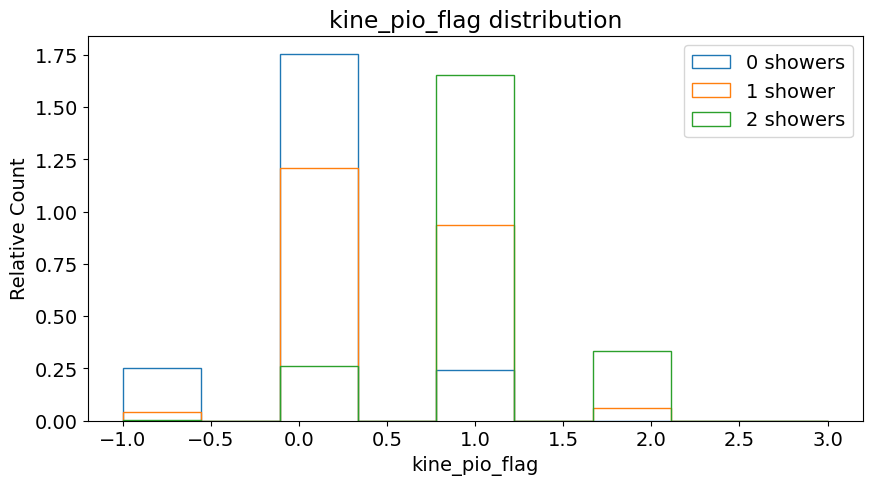

In [45]:
zero_shower_df = wc_df[wc_df["reco_20MeV_electrons"] == 0]
#zero_shower_df = zero_shower_df.query("reco_20MeV_photons == 0")
one_shower_df = wc_df[wc_df["reco_20MeV_electrons"] == 1]
two_shower_df = wc_df[wc_df["reco_20MeV_electrons"] == 2]

one_electron = wc_df[wc_df["reco_20MeV_electrons"] == 1]
one_electron_zero_photon = wc_df[
    (wc_df["reco_20MeV_electrons"] == 1) & (wc_df["reco_20MeV_photons"] == 0)
]

#print(one_electron)


plt.figure(figsize=(10, 5))
plt.hist(zero_shower_df["kine_pio_flag"], bins=np.linspace(-1, 3, 10), histtype="step", label="0 showers", density=True)
plt.hist(one_shower_df["kine_pio_flag"], bins=np.linspace(-1, 3, 10), histtype="step", label="1 shower", density=True)
plt.hist(two_shower_df["kine_pio_flag"], bins=np.linspace(-1, 3, 10), histtype="step", label="2 showers", density=True)
         
plt.xlabel("kine_pio_flag") 
plt.title("kine_pio_flag distribution")
plt.ylabel("Relative Count")
plt.legend()
plt.show()


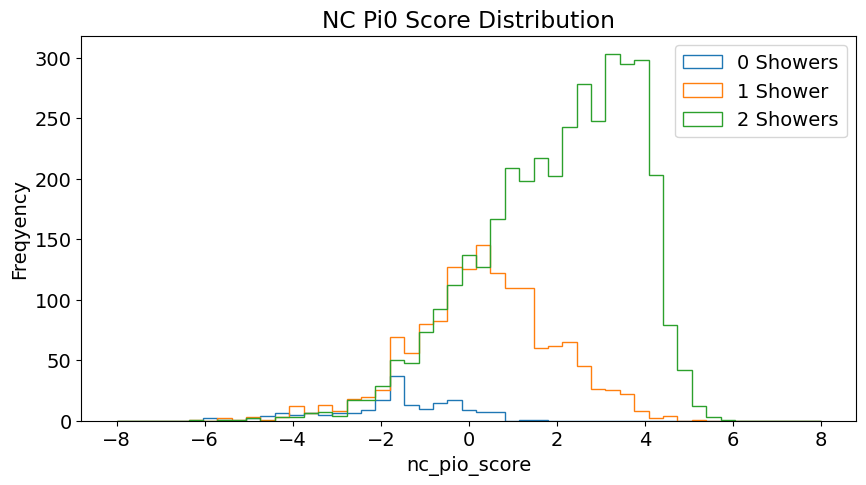

In [46]:
plt.figure(figsize=(10, 5))
plt.hist(zero_shower_df["nc_pio_score"], bins=np.linspace(-8, 8, 50), histtype="step", label="0 Showers", density=False)
plt.hist(one_shower_df["nc_pio_score"], bins=np.linspace(-8, 8, 50), histtype="step", label="1 Shower", density=False)
plt.hist(two_shower_df["nc_pio_score"], bins=np.linspace(-8, 8, 50), histtype="step", label="2 Showers", density=False)

plt.xlabel("nc_pio_score") 
plt.title("NC Pi0 Score Distribution")
plt.ylabel("Freqyency")
plt.legend()
plt.show()

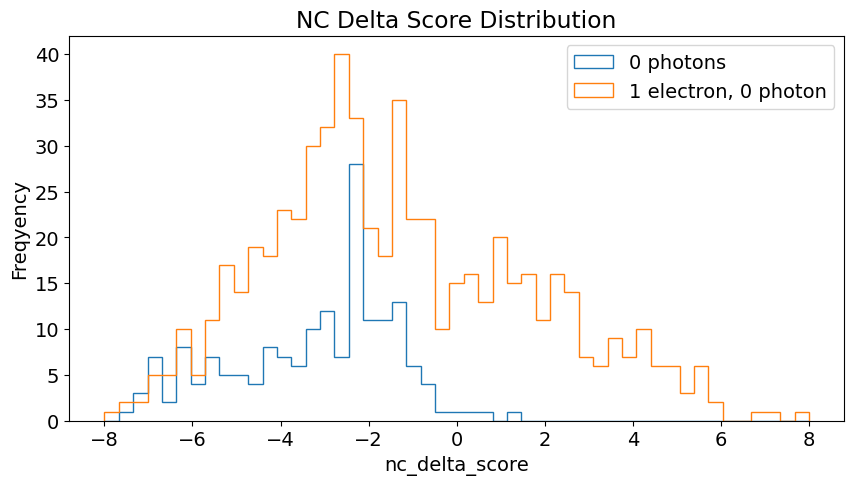

In [47]:


plt.figure(figsize=(10, 5))
plt.hist(zero_shower_df["nc_delta_score"], bins=np.linspace(-8, 8, 50), histtype="step", label="0 photons", density=False)
#plt.hist(one_electron["nc_delta_score"], bins=np.linspace(-8, 8, 50), histtype="step", label="1 electron", density=False)
plt.hist(one_electron_zero_photon["nc_delta_score"], bins=np.linspace(-8, 8, 50), histtype="step", label="1 electron, 0 photon", density=False)

one_electron = wc_df[wc_df["reco_20MeV_electrons"] == 1]
#plt.hist(one_shower_df["nc_delta_score"], bins=np.linspace(-8, 8, 50), histtype="step", label="1 Shower", density=False)
#plt.hist(two_shower_df["nc_delta_score"], bins=np.linspace(-8, 8, 50), histtype="step", label="2 Showers", density=False)

plt.xlabel("nc_delta_score") 
plt.title("NC Delta Score Distribution")
plt.ylabel("Freqyency")
plt.legend()
plt.show()

In [48]:
correct_df =  wc_df[wc_df["success_num"] == 2]

incorrect_df =  wc_df[wc_df["success_num"] == 1]

plt.figure(figsize=(10, 5))
plt.hist(incorrect_df["distance_nu_truth"], bins=np.linspace(-8, 80, 50), histtype="step", label="Incorrectly Reconstructed", density=True)
plt.hist(correct_df["distance_nu_truth"], bins=np.linspace(-8, 80, 50), histtype="step", label="Correctly Reconstructed", density=True)
#plt.hist(two_shower_df["distance_nu_truth"], bins=np.linspace(-8, 80, 50), histtype="step", label="2 Showers", density=False)

plt.xlabel("Distance to Boundary") 
plt.title("Distance Distribution")
plt.ylabel("Frequency")
plt.legend()
plt.show()

KeyError: 'distance_nu_truth'

<Figure size 1000x500 with 0 Axes>

# Lee's Code

In [ ]:
# lee's code to define vertex

for event_i in tqdm(range(42294)):
    
    num_particles = len(wc_df["truth_id"][event_i])
            
    curr_true_num_gamma = 0
    curr_true_gamma_energies = []
    curr_true_gamma_pairconversion_xs = []
    curr_true_gamma_pairconversion_ys = []
    curr_true_gamma_pairconversion_zs = []
    curr_true_num_gamma_pairconvert = 0
    curr_true_num_gamma_pairconvert_in_FV = 0
    curr_true_num_gamma_pairconvert_in_FV_20_MeV = 0

    pi0_ids = []
    for i in range(num_particles):
        if wc_df["truth_pdg"][event_i][i] == 111:
            pi0_ids.append(wc_df["truth_id"][event_i][i])

    primary_or_pi0_gamma_ids = []
    for i in range(num_particles):
        if wc_df["truth_mother"][event_i][i] in pi0_ids or wc_df["truth_mother"][event_i][i] == 0: # this is a daughter of a pi0 or a primary gamma (most likely from an eta or Delta radiative)
            if wc_df["truth_pdg"][event_i][i] == 22: # this is a gamma from a pi0
                curr_true_num_gamma += 1
                curr_true_gamma_energies.append(wc_df["truth_startMomentum"][event_i][i][3])
                primary_or_pi0_gamma_ids.append(wc_df["truth_id"][event_i][i])
                
    for i in range(num_particles):
        if wc_df["truth_id"][event_i][i] in primary_or_pi0_gamma_ids: # pi0/primary -> gamma
            original_gamma_energy = wc_df["truth_startMomentum"][event_i][i][3]
            cumulative_deposited_energy = 0
            while True:
                curr_id = wc_df["truth_id"][event_i][i]
                descendants_ids = []
                descendants_indices = []
                descendants_pdgs = []
                for j in range(num_particles):
                    if wc_df["truth_mother"][event_i][j] == curr_id: # pi0/primary -> gamma -> this particle
                        descendants_ids.append(wc_df["truth_id"][event_i][j])
                        descendants_indices.append(j)
                        descendants_pdgs.append(wc_df["truth_pdg"][event_i][j])

                for descendant_i in range(len(descendants_indices)):
                    if abs(descendants_pdgs[descendant_i]) == 11: # electron/positron daughter
                        cumulative_deposited_energy += wc_df["truth_startMomentum"][event_i][descendants_indices[descendant_i]][3]

                if cumulative_deposited_energy > original_gamma_energy / 2: # it has deposited enough energy to effectively count as a pair conversion
                    break

                if 22 in descendants_pdgs: # found a compton scatter, hasn't deposited enough energy yet, loop to consider that next photon
                    curr_id = descendants_ids[descendants_pdgs.index(22)]
                    #print("doing a compton scatter")
                else: # no compton scatter, we're done, it's either a pair conversion or photoelectric absorption or a Geant tree deletion
                    break

  0%|          | 0/42294 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [55]:
# lee's code unedited

import sys
import uproot
import numpy as np
from tqdm import tqdm
import pickle
import argparse
import pandas as pd

#from helpers.plotting_3d import generate_box_edge_points, plot_event
#from helpers.spacepoint_sampling import fps_clustering_downsample, get_min_dists, energy_weighted_density_sampling


def get_vtx_and_true_gamma_info(f, num_events):
    # loads non-spacepoint information from the root file, including RSE, true nu vtx, reco nu vtx, and true gamma info

    print("getting true gamma information")

    rse = f["wcpselection"]["T_eval"].arrays(["run", "subrun", "event"], library="np", entry_start=0, entry_stop=num_events)
    true_nu_vtx = f["wcpselection"]["T_eval"].arrays(["truth_vtxX", "truth_vtxY", "truth_vtxZ"], library="np", entry_start=0, entry_stop=num_events)
    true_nu_vtx = np.stack([true_nu_vtx["truth_vtxX"], true_nu_vtx["truth_vtxY"], true_nu_vtx["truth_vtxZ"]], axis=-1)
    reco_nu_vtx = f["wcpselection"]["T_PFeval"].arrays(["reco_nuvtxX", "reco_nuvtxY", "reco_nuvtxZ"], library="np", entry_start=0, entry_stop=num_events)
    reco_nu_vtx = np.stack([reco_nu_vtx["reco_nuvtxX"], reco_nu_vtx["reco_nuvtxY"], reco_nu_vtx["reco_nuvtxZ"]], axis=-1)

    true_gamma_info_df = pd.DataFrame({
        "run": rse["run"],
        "subrun": rse["subrun"],
        "event": rse["event"],
        "true_nu_vtx_x": true_nu_vtx[:, 0],
        "true_nu_vtx_y": true_nu_vtx[:, 1],
        "true_nu_vtx_z": true_nu_vtx[:, 2],
        "reco_nu_vtx_x": reco_nu_vtx[:, 0],
        "reco_nu_vtx_y": reco_nu_vtx[:, 1],
        "reco_nu_vtx_z": reco_nu_vtx[:, 2],
    })

    # these variables will be used to define signal vs background
    # only includes gammas from a pi0 (primary or non-primary)
    true_num_gamma = []
    true_gamma_energies = []
    true_gamma_pairconversion_xs = []
    true_gamma_pairconversion_ys = []
    true_gamma_pairconversion_zs = []
    true_num_gamma_pairconvert = []
    true_num_gamma_pairconvert_in_FV = []
    true_num_gamma_pairconvert_in_FV_20_MeV = []
    true_momentum_of_original = []

    wc_geant_dic = f["wcpselection"]["T_PFeval"].arrays(["truth_id", "truth_mother", "truth_pdg", "truth_startMomentum", "truth_startXYZT", "truth_endXYZT"], library="np")

    for event_i in tqdm(range(num_events)):
        
        num_particles = len(wc_geant_dic["truth_id"][event_i])
                
        curr_true_num_gamma = 0
        curr_true_gamma_energies = []
        curr_true_gamma_pairconversion_xs = []
        curr_true_gamma_pairconversion_ys = []
        curr_true_gamma_pairconversion_zs = []
        curr_original_momentum = []
        curr_true_num_gamma_pairconvert = 0
        curr_true_num_gamma_pairconvert_in_FV = 0
        curr_true_num_gamma_pairconvert_in_FV_20_MeV = 0

        pi0_ids = []
        for i in range(num_particles):
            if wc_geant_dic["truth_pdg"][event_i][i] == 111:
                pi0_ids.append(wc_geant_dic["truth_id"][event_i][i])

        primary_or_pi0_gamma_ids = []
        for i in range(num_particles):
            if wc_geant_dic["truth_mother"][event_i][i] in pi0_ids or wc_geant_dic["truth_mother"][event_i][i] == 0: # this is a daughter of a pi0 or a primary gamma (most likely from an eta or Delta radiative)
                if wc_geant_dic["truth_pdg"][event_i][i] == 22: # this is a gamma from a pi0
                    curr_true_num_gamma += 1
                    curr_true_gamma_energies.append(wc_geant_dic["truth_startMomentum"][event_i][i][3])
                    curr_original_momentum.append([wc_geant_dic["truth_startMomentum"][event_i][i][0], wc_geant_dic["truth_startMomentum"][event_i][i][1], wc_geant_dic["truth_startMomentum"][event_i][i][2]])
                    primary_or_pi0_gamma_ids.append(wc_geant_dic["truth_id"][event_i][i])

        # looking for the first point where the photon transfers more than half its energy to daughter charged particles
        # should be 100% for pair production, but compton scatters can also effectively cause the start of a shower
        # daughter particles could disappear from the geant tree even if it pair converts, that type of photon won't be included here

        # looking for pair conversion points, allowing for the possibility of Compton scattering
        for i in range(num_particles):
            if wc_geant_dic["truth_id"][event_i][i] in primary_or_pi0_gamma_ids: # pi0/primary -> gamma

                original_gamma_energy = wc_geant_dic["truth_startMomentum"][event_i][i][3]
                cumulative_deposited_energy = 0
                curr_id = wc_geant_dic["truth_id"][event_i][i]
                # loop until we deposit enough charged energy, or run out of daughters
                loop_counter = 0
                while True:
                    loop_counter += 1
                    if loop_counter > 100:
                        print(f"infinite loop detected in event {event_i}")
                        break

                    
                    descendants_ids = []
                    descendants_indices = []
                    descendants_pdgs = []
                    for j in range(num_particles):
                        if wc_geant_dic["truth_mother"][event_i][j] == curr_id: # pi0/primary -> gamma -> this particle
                            descendants_ids.append(wc_geant_dic["truth_id"][event_i][j])
                            descendants_indices.append(j)
                            descendants_pdgs.append(wc_geant_dic["truth_pdg"][event_i][j])

                    for descendant_i in range(len(descendants_indices)):
                        if abs(descendants_pdgs[descendant_i]) == 11: # electron/positron daughter
                            cumulative_deposited_energy += wc_geant_dic["truth_startMomentum"][event_i][descendants_indices[descendant_i]][3]

                    if cumulative_deposited_energy > original_gamma_energy / 2: # it has deposited enough energy to effectively count as a pair conversion
                        break

                    if 22 in descendants_pdgs: # found a compton scatter, hasn't deposited enough energy yet, loop to consider that next photon
                        curr_id = descendants_ids[descendants_pdgs.index(22)]
                        #print("doing a compton scatter")
                    else: # no compton scatter, we're done, it's either a pair conversion or photoelectric absorption or a Geant tree deletion
                        break

                if cumulative_deposited_energy < original_gamma_energy / 2: # weird event, didn't deposit enough energy to count as a pair conversion
                    #print(f"weird event, no daughter photon, but also deposited less than half the energy: {cumulative_deposited_energy} / {original_gamma_energy}, {count}")
                    pass
                else:
                    curr_true_gamma_pairconversion_xs.append(wc_geant_dic["truth_startXYZT"][event_i][descendants_indices[0]][0])
                    curr_true_gamma_pairconversion_ys.append(wc_geant_dic["truth_startXYZT"][event_i][descendants_indices[0]][1])
                    curr_true_gamma_pairconversion_zs.append(wc_geant_dic["truth_startXYZT"][event_i][descendants_indices[0]][2])
                    curr_true_num_gamma_pairconvert += 1

                    if -1 < curr_true_gamma_pairconversion_xs[-1] <= 254.3 and -115.0 < curr_true_gamma_pairconversion_ys[-1] <= 117.0 and 0.6 < curr_true_gamma_pairconversion_zs[-1] <= 1036.4:
                        curr_true_num_gamma_pairconvert_in_FV += 1

                        if original_gamma_energy > 0.02:
                            curr_true_num_gamma_pairconvert_in_FV_20_MeV += 1


        true_num_gamma.append(curr_true_num_gamma)
        true_gamma_energies.append(curr_true_gamma_energies)
        true_gamma_pairconversion_xs.append(curr_true_gamma_pairconversion_xs)
        true_gamma_pairconversion_ys.append(curr_true_gamma_pairconversion_ys)
        true_gamma_pairconversion_zs.append(curr_true_gamma_pairconversion_zs)
        true_num_gamma_pairconvert.append(curr_true_num_gamma_pairconvert)
        true_num_gamma_pairconvert_in_FV.append(curr_true_num_gamma_pairconvert_in_FV)
        true_num_gamma_pairconvert_in_FV_20_MeV.append(curr_true_num_gamma_pairconvert_in_FV_20_MeV)
        
        true_momentum_of_original.append(curr_original_momentum)

    true_gamma_info_df["true_num_gamma"] = true_num_gamma
    true_gamma_info_df["true_gamma_energies"] = true_gamma_energies
    true_gamma_info_df["true_gamma_pairconversion_xs"] = true_gamma_pairconversion_xs
    true_gamma_info_df["true_gamma_pairconversion_ys"] = true_gamma_pairconversion_ys
    true_gamma_info_df["true_gamma_pairconversion_zs"] = true_gamma_pairconversion_zs
    true_gamma_info_df["true_num_gamma_pairconvert"] = true_num_gamma_pairconvert
    true_gamma_info_df["true_num_gamma_pairconvert_in_FV"] = true_num_gamma_pairconvert_in_FV
    true_gamma_info_df["true_num_gamma_pairconvert_in_FV_20_MeV"] = true_num_gamma_pairconvert_in_FV_20_MeV
    
    true_gamma_info_df["true_momentum_of_original"] = true_momentum_of_original

    # returning the vertex information separately, since that will be used for downsampling
    return true_nu_vtx, reco_nu_vtx, true_gamma_info_df


true_nu_vtx, reco_nu_vtx, true_gamma_info_df = get_vtx_and_true_gamma_info(f2, wc_df.shape[0])



getting true gamma information


100%|██████████| 11935/11935 [00:00<00:00, 18662.78it/s]


In [ ]:
# define distance to edge, second shower E

# extra primary shower position and angle variables
shower_thetas = []
shower_phis = []
distances_to_boundary = []
backwards_projected_dists = []

distance_particle_reco_start = []
distance_particle_reco_end = []
distance_particle_truth_start = []
distance_particle_truth_end = []

distance_nu= []

    
reco_shower_momentum = wc_df["reco_showerMomentum"].to_numpy()
reco_nu_vtx_x = wc_df["truth_vtxX"].to_numpy()
reco_nu_vtx_y = wc_df["truth_vtxX"].to_numpy()
reco_nu_vtx_z = wc_df["truth_vtxZ"].to_numpy()

reco_particle_vtx_s = wc_df["reco_startXYZT"].to_numpy()
reco_particle_vtx_e = wc_df["reco_endXYZT"].to_numpy()

truth_particle_vtx_s = wc_df["truth_startXYZT"].to_numpy()
truth_particle_vtx_e = wc_df["reco_endXYZT"].to_numpy()

#print(wc_df.shape[0], "events in the WC data frame")
for i in tqdm(range(wc_df.shape[0])):
    reco_shower_momentum_0 = reco_shower_momentum[i][0]
    reco_shower_momentum_1 = reco_shower_momentum[i][1]
    reco_shower_momentum_2 = reco_shower_momentum[i][2]
    reco_shower_momentum_3 = reco_shower_momentum[i][3]
    
    if reco_shower_momentum_3 > 0:
        reco_shower_momentum_perp = np.sqrt(reco_shower_momentum_0 * reco_shower_momentum_0 + reco_shower_momentum_1 * reco_shower_momentum_1)
        shower_thetas.append(np.arctan2(reco_shower_momentum_perp, reco_shower_momentum_2) * 180. / np.pi)
        shower_phis.append(np.arctan2(reco_shower_momentum_0, reco_shower_momentum_1) * 180. / np.pi)

        shower_momentum_total_3d = np.sqrt(reco_shower_momentum_0 * reco_shower_momentum_0 + 
                                            reco_shower_momentum_1 * reco_shower_momentum_1 + 
                                            reco_shower_momentum_2 * reco_shower_momentum_2)
        shower_unit_vector_3d = [reco_shower_momentum_0 / shower_momentum_total_3d, 
                                    reco_shower_momentum_1 / shower_momentum_total_3d, 
                                    reco_shower_momentum_2 / shower_momentum_total_3d]
        center_x = 130.
        center_y = 0.
        center_z = 525.    
        towards_center_length = np.sqrt((reco_nu_vtx_x[i] - center_x) * (reco_nu_vtx_x[i] - center_x) + 
                                        (reco_nu_vtx_y[i] - center_y) * (reco_nu_vtx_y[i] - center_y) + 
                                        (reco_nu_vtx_z[i] - center_z) * (reco_nu_vtx_z[i] - center_z))
        towards_center_unit_vector_3d = [(center_x - reco_nu_vtx_x[i]) / towards_center_length, 
                                            (center_y - reco_nu_vtx_y[i]) / towards_center_length, 
                                            (center_z - reco_nu_vtx_z[i]) / towards_center_length]

        shower_momentum_total_2d = np.sqrt(reco_shower_momentum_0 * reco_shower_momentum_0 + 
                                            reco_shower_momentum_1 * reco_shower_momentum_1)
        shower_unit_vector_2d = [reco_shower_momentum_0 / shower_momentum_total_3d, 
                                    reco_shower_momentum_1 / shower_momentum_total_3d]
        towards_center_length = np.sqrt((reco_nu_vtx_x[i] - center_x) * (reco_nu_vtx_x[i] - center_x) + 
                                        (reco_nu_vtx_y[i] - center_y) * (reco_nu_vtx_y[i] - center_y))
        towards_center_unit_vector_2d = [(center_x - reco_nu_vtx_x[i]) / towards_center_length, 
                                            (center_y - reco_nu_vtx_y[i]) / towards_center_length]
        
        min_backwards_projected_dist = 1e9
                
        # projecting to x walls
        if shower_unit_vector_3d[0] > 0:
            min_backwards_projected_dist = min(min_backwards_projected_dist, (reco_nu_vtx_x[i] - (-1)) / shower_unit_vector_3d[0])
        else:
            min_backwards_projected_dist = min(min_backwards_projected_dist, (reco_nu_vtx_x[i] - (254.3)) / shower_unit_vector_3d[0])
            
        # projecting to y walls
        if shower_unit_vector_3d[1] > 0:
            min_backwards_projected_dist = min(min_backwards_projected_dist, (reco_nu_vtx_y[i] - (-115.)) / shower_unit_vector_3d[1])
        else:
            min_backwards_projected_dist = min(min_backwards_projected_dist, (reco_nu_vtx_y[i] - (117.)) / shower_unit_vector_3d[1])
            
        # projecting to z walls
        if shower_unit_vector_3d[2] > 0:
            min_backwards_projected_dist = min(min_backwards_projected_dist, (reco_nu_vtx_z[i] - (0.6)) / shower_unit_vector_3d[2])
        else:
            min_backwards_projected_dist = min(min_backwards_projected_dist, (reco_nu_vtx_z[i] - (1036.4)) / shower_unit_vector_3d[2])

        backwards_projected_dists.append(min_backwards_projected_dist)
        
    else:
        shower_thetas.append(np.nan)
        shower_phis.append(np.nan)
        backwards_projected_dists.append(np.nan)
        

        
    distance_nu.append(np.min([
        abs(reco_nu_vtx_x[i] - (-1.)),
        abs(reco_nu_vtx_x[i] - (254.3)),
        abs(reco_nu_vtx_y[i] - (-115.)),
        abs(reco_nu_vtx_y[i] - (117.)),
        abs(reco_nu_vtx_z[i] - (0.6)),
        abs(reco_nu_vtx_z[i] - (1036.4))
    ]))
    
    index_distance_list_reco_s = []
    index_distance_list_reco_e = []
    index_distance_list_truth_s = []
    index_distance_list_truth_e = []
    
    for j in range(len(reco_particle_vtx_s[i])):
        x, y, z, t = reco_particle_vtx_s[i][j]
        if not (-1.0 <= x <= 254.3 and -115.0 <= y <= 117.0 and 0.6 <= z <= 1036.4):
            index_distance_list_reco_s.append(-999)  # outside TPC
        else:
            distance_to_edge = min(
            x - (-1.0), 254.3 - x,
            y - (-115.0), 117.0 - y,
            z - 0.6, 1036.4 - z)
            index_distance_list_reco_s.append(min(
            x - (-1.0), 254.3 - x,
            y - (-115.0), 117.0 - y,
            z - 0.6, 1036.4 - z))     # inside TPC
            
    for j in range(len(reco_particle_vtx_e[i])):
        x, y, z, t = reco_particle_vtx_e[i][j]
        if not (-1.0 <= x <= 254.3 and -115.0 <= y <= 117.0 and 0.6 <= z <= 1036.4):
            index_distance_list_reco_e.append(-999)  # outside TPC
        else:
            distance_to_edge = min(
            x - (-1.0), 254.3 - x,
            y - (-115.0), 117.0 - y,
            z - 0.6, 1036.4 - z)
            index_distance_list_reco_e.append(min(
            x - (-1.0), 254.3 - x,
            y - (-115.0), 117.0 - y,
            z - 0.6, 1036.4 - z))     # inside TPC
            
    for j in range(len(truth_particle_vtx_s[i])):
        x, y, z, t = truth_particle_vtx_s[i][j]
        if not x
            index_distance_list_truth_s.append(-999)  # outside TPC
        else:
            distance_to_edge = min(
            x - (-1.0), 254.3 - x,
            y - (-115.0), 117.0 - y,
            z - 0.6, 1036.4 - z)
            index_distance_list_truth_s.append(min(
            x - (-1.0), 254.3 - x,
            y - (-115.0), 117.0 - y,
            z - 0.6, 1036.4 - z))     # inside TPC
            
    for j in range(len(truth_particle_vtx_e[i])):
        x, y, z, t = truth_particle_vtx_e[i][j]
        if not (-1.0 <= x <= 254.3 and -115.0 <= y <= 117.0 and 0.6 <= z <= 1036.4):
            index_distance_list_truth_e.append(-999)  # outside TPC
        else:
            index_distance_list_truth_e.append(min(
            x - (-1.0), 254.3 - x,
            y - (-115.0), 117.0 - y,
            z - 0.6, 1036.4 - z))     # inside TPC

    distance_particle_reco_start.append(index_distance_list_reco_s)
    distance_particle_reco_end.append(index_distance_list_reco_e)
    distance_particle_truth_start.append(index_distance_list_truth_s)
    distance_particle_truth_end.append(index_distance_list_truth_e)
    

wc_df["reco_shower_theta"] = shower_thetas
wc_df["reco_shower_phi"] = shower_phis
wc_df["distance_nu_truth"] = distance_nu
wc_df["reco_backwards_projected_dist"] = backwards_projected_dists

wc_df['reco_distance_start'] = distance_particle_reco_start
wc_df['reco_distance_end'] = distance_particle_reco_end
wc_df['truth_distance_start'] = distance_particle_truth_start
wc_df['truth_distance_end'] = distance_particle_truth_end

wc_df['truth_distance_start']

#wc_df['truth_distance_start'].to_csv('output2.csv', index=False)

 43%|████▎     | 18184/42294 [00:02<00:03, 7015.44it/s]/var/folders/_s/7j_881g14zd1rn9kv4_hn7nw0000gn/T/ipykernel_92772/665844056.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  min_backwards_projected_dist = min(min_backwards_projected_dist, (reco_nu_vtx_z[i] - (1036.4)) / shower_unit_vector_3d[2])
100%|██████████| 42294/42294 [00:06<00:00, 6748.65it/s]


0        [18.801285, 18.801285, 18.801285, 18.801285, 2...
1        [93.553085, 93.553085, 93.553085, 93.553085, 9...
2        [44.0982, 44.0982, 44.0982, 44.0982, 44.0982, ...
3        [3.4359818, 3.4359818, 3.4359818, 3.4359818, 3...
4        [38.76454, 38.76454, 38.76454, 38.76454, 38.76...
                               ...                        
42289    [26.495163, 26.495163, 26.495163, 26.495163, 2...
42290    [10.379677, 10.379677, 10.379677, 10.379677, 1...
42291    [100.665054, 100.665054, 100.665054, 100.66505...
42292    [53.163437, 53.163437, 53.163437, 53.16344, 53...
42293    [45.852448, 45.852448, 45.852448, 45.852448, 4...
Name: truth_distance_start, Length: 42294, dtype: object

In [50]:
# similar to above but just raises flag for signal/background

signal_flag = np.full(42294, False, dtype=bool)
background_flag = np.full(42294, False, dtype=bool)

truth_particle_vtx_e = wc_df["truth_endXYZT"].to_numpy()
truth_momentum = wc_df["truth_startMomentum"].to_numpy()

inside = 0
outside = 0
both = 0


enu = wc_df["kine_reco_Enu"].to_numpy()

for i in tqdm(range(wc_df.shape[0])):
    
    truth_ids = wc_df["truth_id"].to_numpy()[i] 
    truth_pdgs = wc_df["truth_pdg"].to_numpy()[i]
    truth_mother = wc_df["truth_mother"].to_numpy()[i]
    
    index_distance_list_truth_s = []
    
    one_outside_tpc = False
    one_inside_tpc = False
    
    one_high_energy = False
    one_low_energy = False
    
    if enu[i] < 0:
        continue
        
    for j in range(len(truth_particle_vtx_e[i])):
        pdg = truth_pdgs[j]
        if pdg == 22:
            mother_index = np.where(truth_ids == truth_mother[j])[0]
            if mother_index.size == 0:
                continue
            mother_pdg = truth_pdgs[mother_index]
            if np.any(mother_pdg == 111):         
                x, y, z, t = truth_particle_vtx_e[i][j]
                if not (-1.0 <= x <= 254.3 and -115.0 <= y <= 117.0 and 0.6 <= z <= 1036.4):
                    index_distance_list_truth_e.append(-999)  # outside TPC
                    one_outside_tpc = True
                else:
                    one_inside_tpc = True
                    index_distance_list_truth_e.append(min(
                    x - (-1.0), 254.3 - x,
                    y - (-115.0), 117.0 - y,
                    z - 0.6, 1036.4 - z))     # inside TPC
                
            # now do background flagging
            energy = truth_momentum[i][j][3]
            if energy > .02:
                one_high_energy = True
            if energy < .02: 
                one_low_energy = True
    if one_outside_tpc:
        outside += 1
    if one_inside_tpc:
        inside += 1
    if one_outside_tpc and one_inside_tpc:
        background_flag[i] = True
        both += 1
        
    
    if one_high_energy and one_low_energy and not one_outside_tpc:
        signal_flag[i] = True

    distance_particle_truth_end.append(index_distance_list_truth_e)

print(f'signal percentage: {100 * np.sum(signal_flag)/42294}')
print(f'background percentage: {100 * np.sum(background_flag)/42294}')

print(inside, outside, both, inside + outside)

wc_df['signal_v1'] = signal_flag
wc_df['background_v1'] = background_flag

wc_df["signal_v1"].to_csv('one.csv')

  0%|          | 0/11935 [00:00<?, ?it/s]


NameError: name 'index_distance_list_truth_e' is not defined

# Signal/Background Flag Raising

In [51]:
# similar to above but just raises flag for signal/background

true_gamma_xs = true_gamma_info_df["true_gamma_pairconversion_xs"].to_numpy()
true_gamma_ys = true_gamma_info_df["true_gamma_pairconversion_ys"].to_numpy()
true_gamma_zs = true_gamma_info_df["true_gamma_pairconversion_zs"].to_numpy()

inside = 0
outside = 0
both = 0

signal_flag = np.full(42294, False, dtype=bool)
background_flag = np.full(42294, False, dtype=bool)

truth_particle_vtx_e = wc_df["truth_endXYZT"].to_numpy()
truth_momentum = wc_df["truth_startMomentum"].to_numpy()

truth_pdgs = wc_df["truth_pdg"].to_numpy()
truth_mother = wc_df["truth_mother"].to_numpy()

enu = wc_df["kine_reco_Enu"].to_numpy()

for i in tqdm(range(wc_df.shape[0])):
    
    truth_ids = wc_df["truth_id"].to_numpy()[i]
    
    index_distance_list_truth_s = []
    
    one_outside_tpc = False
    one_inside_tpc = False
    
    one_high_energy = False
    one_low_energy = False
    
    if enu[i] < 0:
        continue
    
    if len(true_gamma_xs[i]) > 0 and len(true_gamma_ys[i]) > 0 and len(true_gamma_zs[i]) > 0:
        xs, ys, zs = true_gamma_xs[i], true_gamma_ys[i], true_gamma_zs[i]

        for x, y, z in zip(xs, ys, zs):
            if not (-1.0 <= x <= 254.3 and -115.0 <= y <= 117.0 and 0.6 <= z <= 1036.4):
                one_outside_tpc = True
            else:
                one_inside_tpc = True
                
    
        
    for j in range(len(truth_particle_vtx_e[i])):
        pdg = truth_pdgs[i][j]
        if pdg == 22:
            mother_index = np.where(truth_ids == truth_mother[i][j])[0]
            if mother_index.size == 0:
                continue
            mother_pdg = truth_pdgs[i][mother_index]
            if np.any(mother_pdg == 111):  
                energy = truth_momentum[i][j][3]
                if energy > .02:
                    one_high_energy = True
                if energy < .02: 
                    one_low_energy = True
    if one_outside_tpc:
        outside += 1
    if one_inside_tpc:
        inside += 1
    if one_outside_tpc and one_inside_tpc:
        both += 1
        background_flag[i] = True
    
    if one_high_energy and one_low_energy and not one_outside_tpc:
        signal_flag[i] = True

    distance_particle_truth_end.append(index_distance_list_truth_e)

print(f'signal percentage: {100 * np.sum(signal_flag)/42294}')
print(f'background percentage: {100 * np.sum(background_flag)/42294}')

print(inside, outside, both, np.sum(background_flag), np.sum(signal_flag))

wc_df['signal_v0'] = signal_flag
wc_df['background_v0'] = background_flag


  0%|          | 0/11935 [00:00<?, ?it/s]


NameError: name 'distance_particle_truth_end' is not defined

In [ ]:
# similar to above but just raises flag for signal/background

true_gamma_xs = true_gamma_info_df["true_gamma_pairconversion_xs"].to_numpy()
true_gamma_ys = true_gamma_info_df["true_gamma_pairconversion_ys"].to_numpy()
true_gamma_zs = true_gamma_info_df["true_gamma_pairconversion_zs"].to_numpy()

true_gamma_energies = true_gamma_info_df["true_gamma_energies"].to_numpy()

true_nu_xs = true_gamma_info_df['true_nu_vtx_x'].to_numpy()
true_nu_ys = true_gamma_info_df['true_nu_vtx_y'].to_numpy()
true_nu_zs = true_gamma_info_df['true_nu_vtx_z'].to_numpy()

inside = 0
outside = 0
both = 0

signal_flag = np.full(wc_df['truth_id'].shape[0], False, dtype=bool)
background_flag = np.full(wc_df['truth_id'].shape[0], False, dtype=bool)

truth_particle_vtx_e = wc_df["truth_endXYZT"].to_numpy()
truth_momentum = wc_df["truth_startMomentum"].to_numpy()

truth_ids = wc_df["truth_id"].to_numpy()
truth_pdgs = wc_df["truth_pdg"].to_numpy()
truth_mother = wc_df["truth_mother"].to_numpy()

enu = wc_df["kine_reco_Enu"].to_numpy()


for i in tqdm(range(wc_df.shape[0])):
    
    index_distance_list_truth_s = []
    
    one_outside_tpc = False
    one_inside_tpc = False
    
    one_high_energy = False
    one_low_energy = False
    
    well_contained = False
    
    if enu[i] < 0:
        continue
    
    nu_x, nu_y, nu_z = true_nu_xs[i], true_nu_ys[i], true_nu_zs[i]
    
    if (29.0 <= nu_x <= 224.3 and -85 <= nu_y <= 87.0 and 30.6 <= nu_z <= 1006.4):
        well_contained = True
    
    if len(true_gamma_xs[i]) > 0 and len(true_gamma_ys[i]) > 0 and len(true_gamma_zs[i]) > 0:
        for particle in range(len(true_gamma_xs[i])):
            x, y, z = true_gamma_xs[i][particle], true_gamma_ys[i][particle], true_gamma_zs[i][particle]
            if not (-1.0 <= x <= 254.3 and -115.0 <= y <= 117.0 and 0.6 <= z <= 1036.4):
                one_outside_tpc = True
            else:
                one_inside_tpc = True
            energy = true_gamma_energies[i][particle]
            if energy > .02:
                one_high_energy = True
            if energy < .02: 
                one_low_energy = True
    
    if one_outside_tpc:
        outside += 1
    if one_inside_tpc:
        inside += 1
    if one_outside_tpc and one_inside_tpc:
        both += 1
        background_flag[i] = True
    
    #if one_high_energy and one_low_energy and not one_outside_tpc:
    if well_contained and not one_outside_tpc:
        signal_flag[i] = True

    #distance_particle_truth_end.append(index_distance_list_truth_e)

print(f'signal percentage: {100 * np.sum(signal_flag)/42294}')
print(f'background percentage: {100 * np.sum(background_flag)/42294}')

print(np.sum(background_flag), np.sum(signal_flag))

#wc_df['signal_v1'] = signal_flag # signal_v1 should still be old definition of signal (one above 20mev, one below)
#wc_df['background_v1'] = background_flag

wc_df['signal_v2'] = signal_flag # v2 has at least 30cm of boundary and no lost shower
wc_df['background_v2'] = background_flag

signal_df = wc_df[wc_df["signal_v2"] == True]
background_df = wc_df[wc_df["background_v2"] == True]


100%|██████████| 11935/11935 [00:00<00:00, 507029.46it/s]

signal percentage: 11.831465456093063
background percentage: 1.678725114673476
710 5004


# Post Processing Histograms

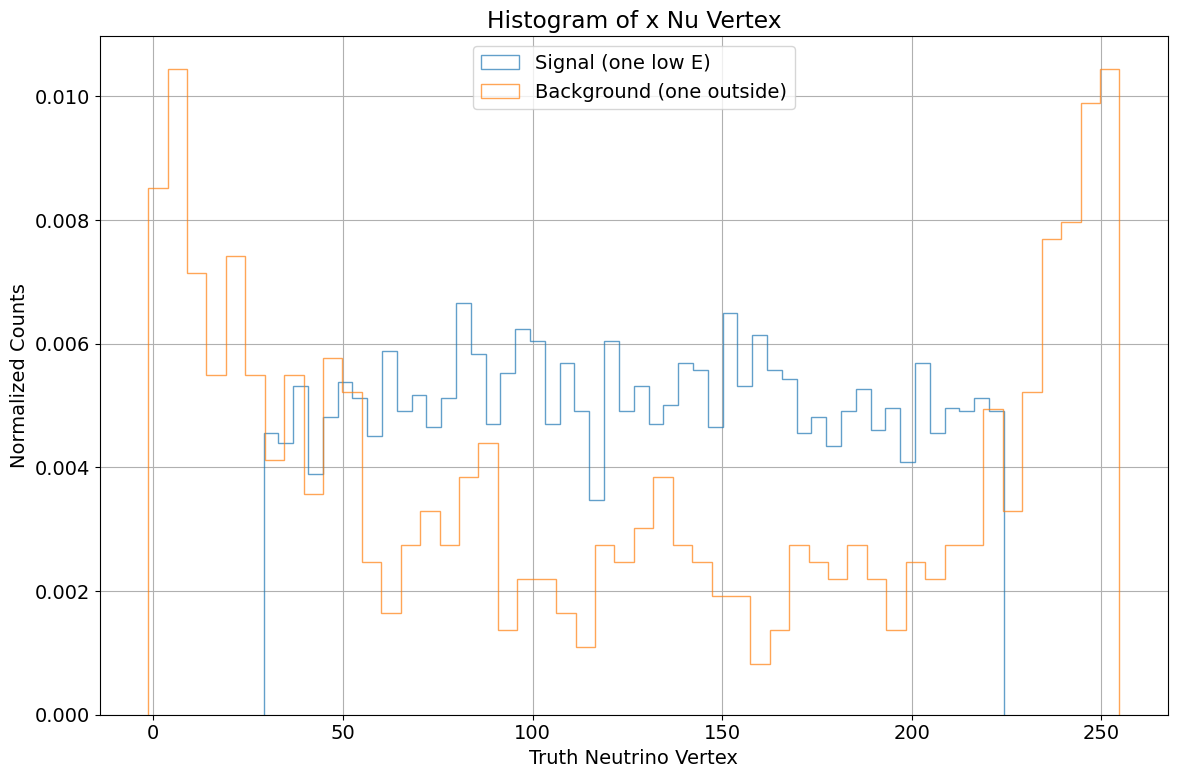

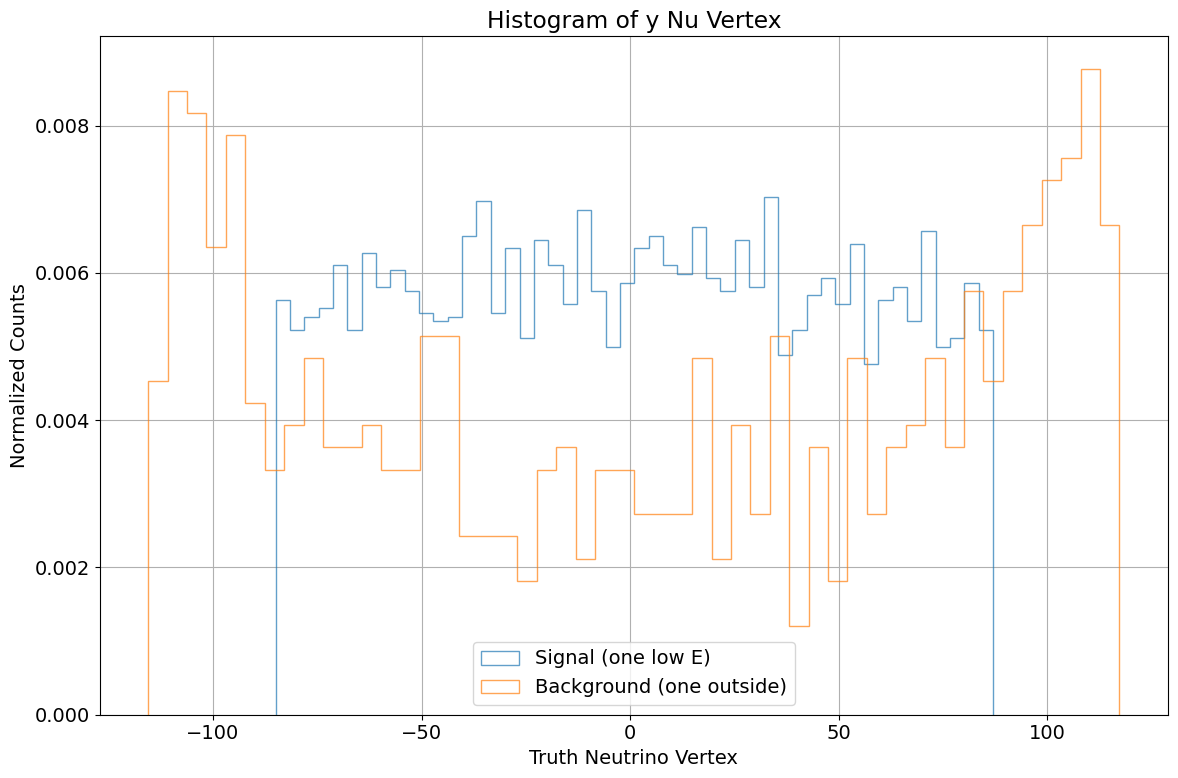

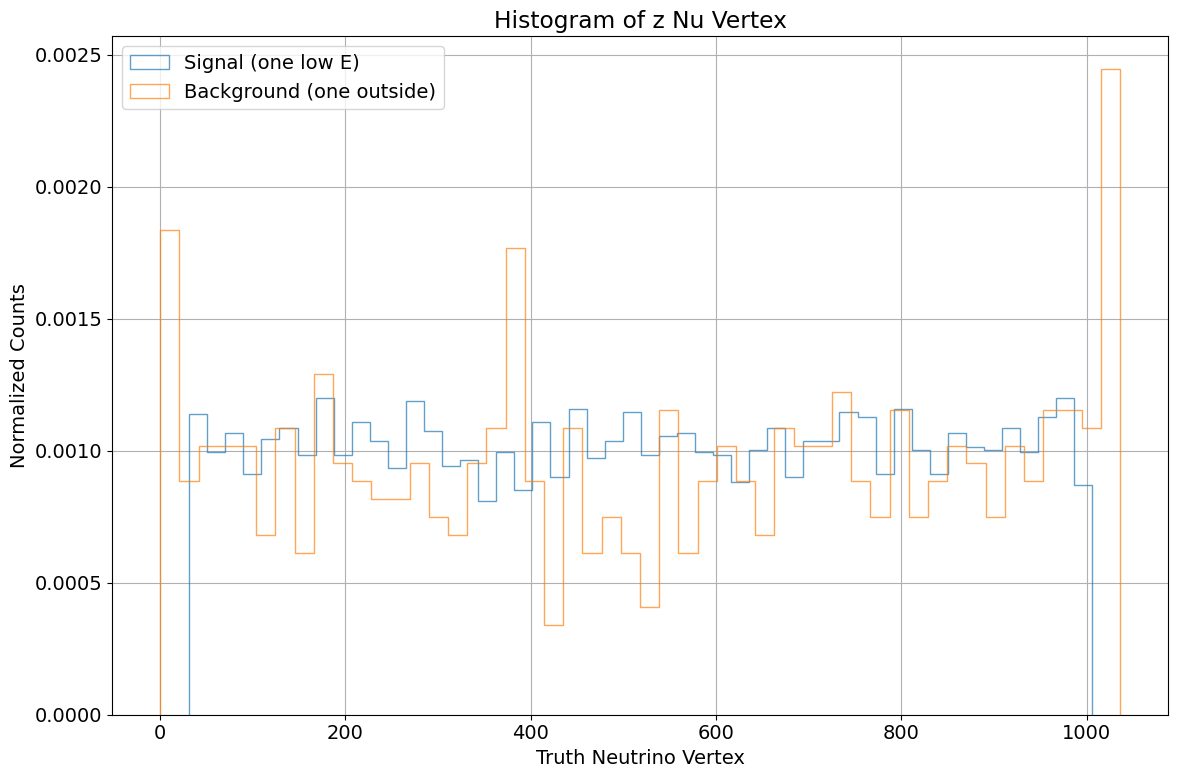

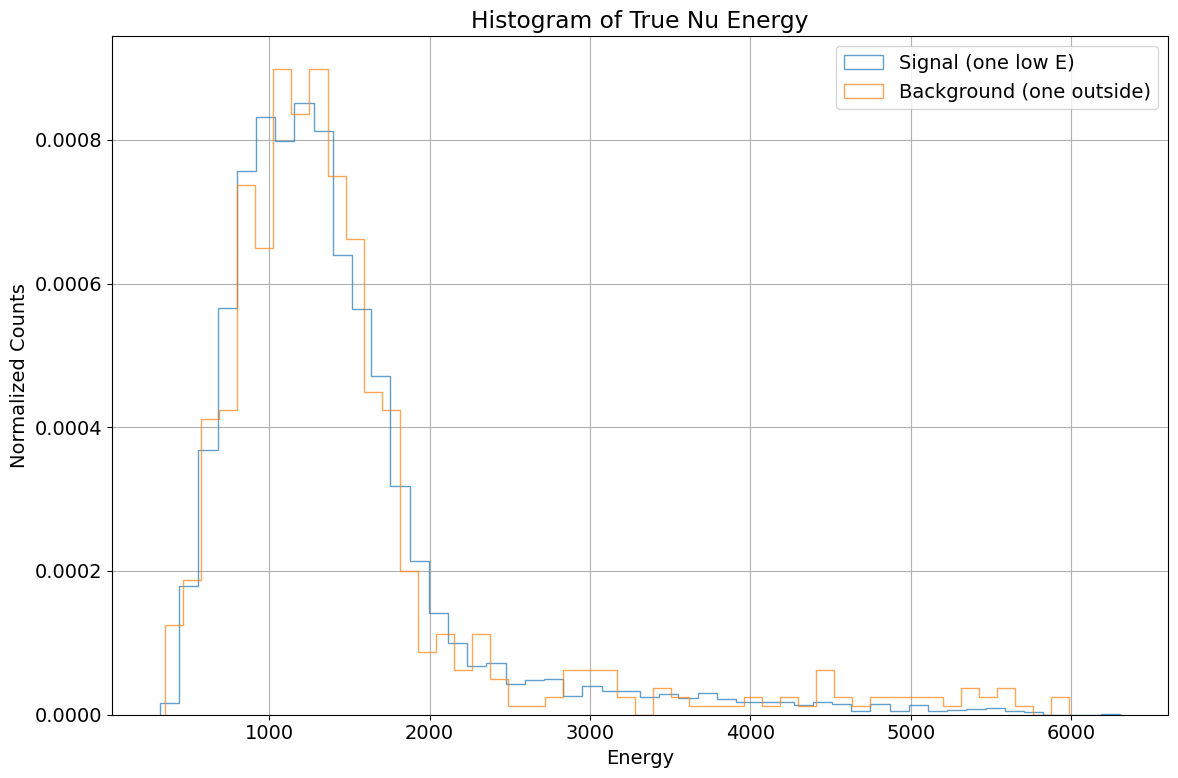

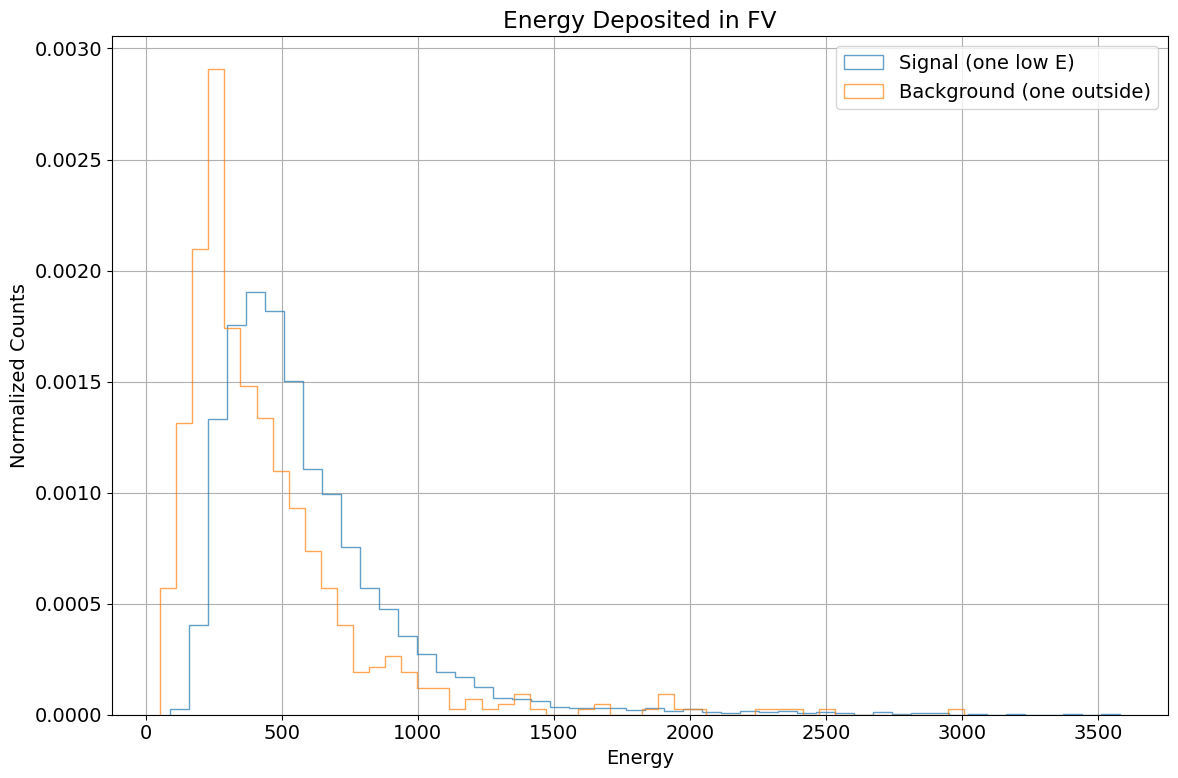

In [53]:
reco_energy = wc_df["reco_startMomentum"].to_numpy()

def make_a_hist(true_variable, reco_variable, title, xaxis):
   
    plt.figure(figsize=(12, 8))
    
    plt.hist(signal_df[true_variable], bins=50, alpha=0.7, label='Signal (one low E)', histtype='step', stacked=True, fill=False, density = True)
    plt.hist(background_df[true_variable], bins=50, alpha=0.7, label='Background (one outside)', histtype='step', stacked=True, fill=False, density = True)

    #plt.hist(wc_df[true_variable], bins=100, alpha=0.7, label='Truth Two Photons', histtype='step', stacked=True, fill=False)
    #plt.hist(correct_df[reco_variable], bins=50, alpha=0.7, label='Correctly Reconstructed', histtype='step', stacked=True, fill=False)
    #plt.hist(incorrect_df[reco_variable], bins=50, alpha=0.7, label='Incorrect Reconstructions', histtype='step', stacked=True, fill=False)
    #plt.hist(outside_tpc_df[reco_variable], bins=50, alpha=0.7, label='Incorrect Reconstructions', histtype='step', stacked=True, fill=False)
    plt.xlabel(xaxis)
    plt.ylabel('Normalized Counts')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


make_a_hist("truth_vtxX", None, 'Histogram of x Nu Vertex','Truth Neutrino Vertex' )
make_a_hist("truth_vtxY", None, 'Histogram of y Nu Vertex','Truth Neutrino Vertex' )
make_a_hist("truth_vtxZ", None, 'Histogram of z Nu Vertex','Truth Neutrino Vertex' )
make_a_hist("truth_nuEnergy", None, "Histogram of True Nu Energy", "Energy")
make_a_hist('truth_energyInside', None, "Energy Deposited in FV", "Energy")
#make_a_hist(None, 'delta_score', 'NC Delta Score Distribution', 'NC Delta Score')
#make_a_hist(None, 'nc_pio_score', 'NC pi0 Score Distribution', 'NC pi0 Score')

In [54]:
# make a hist reco version (this takes the events that are flagged on truth level as signal/background and shows the same histograms on reco level)

reco_energy = wc_df["reco_startMomentum"].to_numpy()

def make_a_hist_reco(truth_variable, reco_variable, title, xaxis):
    
    signal_df = wc_df[wc_df["signal_v1"] == True]
    background_df = wc_df[wc_df["background_v1"] == True]
   
    plt.figure(figsize=(12, 8))
    
    plt.hist(signal_df[truth_variable], bins=30, alpha=0.7, label='Truth Signal', histtype='step', stacked=True, fill=False, density = True)
    plt.hist(background_df[truth_variable], bins=30, alpha=0.7, label='Truth Background', histtype='step', stacked=True, fill=False, density = True)

    plt.hist(signal_df[reco_variable], bins=30, alpha=0.7, label='Reco Signal', histtype='step', stacked=True, fill=False, density = True)
    plt.hist(background_df[reco_variable], bins=30, alpha=0.7, label='Reco Background', histtype='step', stacked=True, fill=False, density = True)
    #plt.hist(wc_df[true_variable], bins=100, alpha=0.7, label='Truth Two Photons', histtype='step', stacked=True, fill=False)
    #plt.hist(correct_df[reco_variable], bins=50, alpha=0.7, label='Correctly Reconstructed', histtype='step', stacked=True, fill=False)
    #plt.hist(incorrect_df[reco_variable], bins=50, alpha=0.7, label='Incorrect Reconstructions', histtype='step', stacked=True, fill=False)
    #plt.hist(outside_tpc_df[reco_variable], bins=50, alpha=0.7, label='Incorrect Reconstructions', histtype='step', stacked=True, fill=False)
    plt.xlabel(xaxis)
    plt.ylabel('Normalized Counts')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


make_a_hist_reco("truth_vtxX", 'reco_nuvtxX', 'Histogram of x Nu Vertex','Truth Neutrino Vertex' )
make_a_hist_reco("truth_vtxY", 'reco_nuvtxY', 'Histogram of y Nu Vertex','Neutrino Vertex' )
make_a_hist_reco("truth_vtxZ", 'reco_nuvtxZ', 'Histogram of z Nu Vertex','Neutrino Vertex' )
make_a_hist_reco("truth_nuEnergy", 'kine_reco_Enu', "Histogram of True Nu Energy", "Energy")
#make_a_hist('truth_energyInside', ???, "Energy Inside", "Energy")
#make_a_hist(None, 'delta_score', 'NC Delta Score Distribution', 'NC Delta Score')
#make_a_hist(None, 'nc_pio_score', 'NC pi0 Score Distribution', 'NC pi0 Score')

KeyError: 'signal_v1'

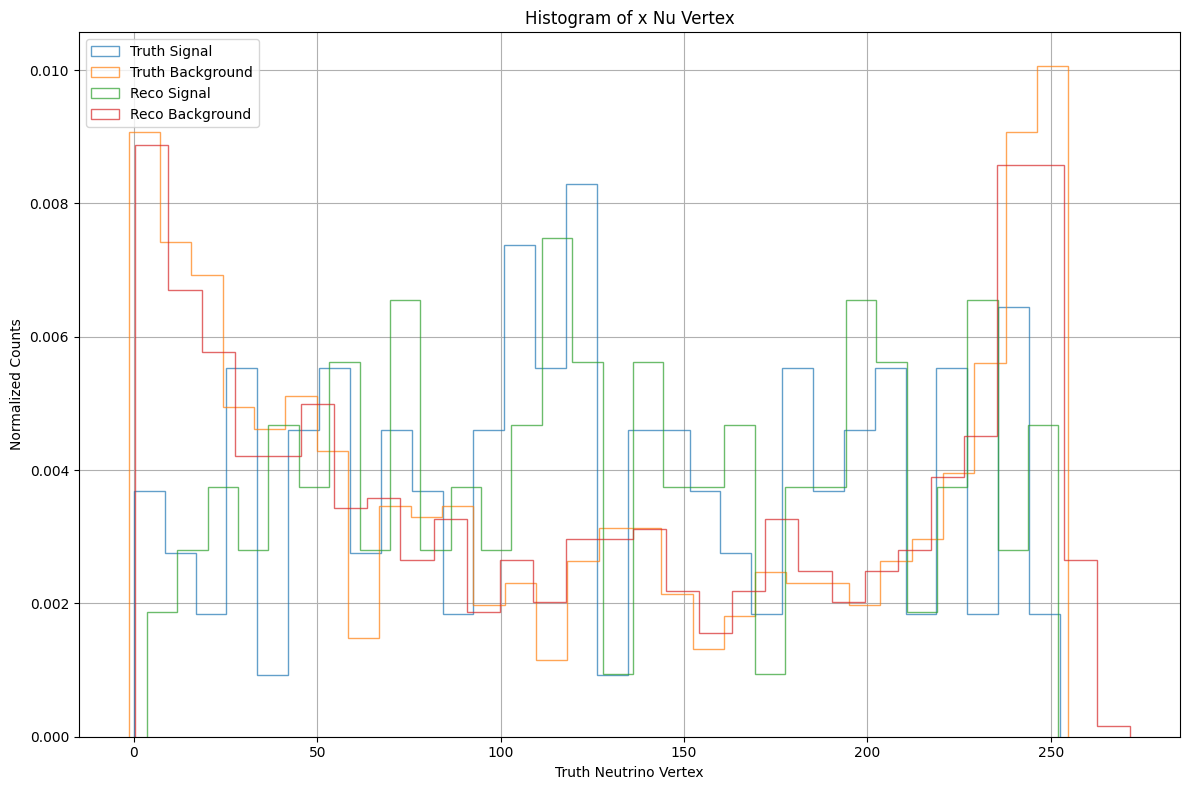

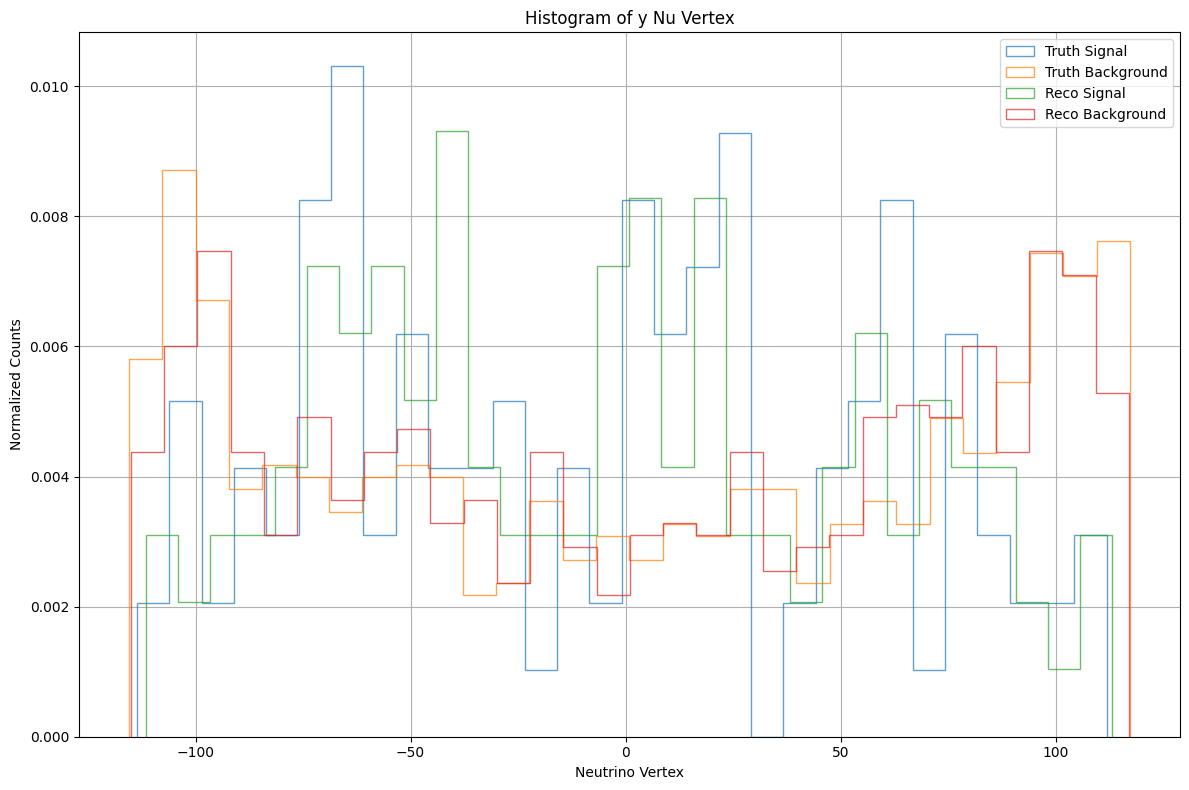

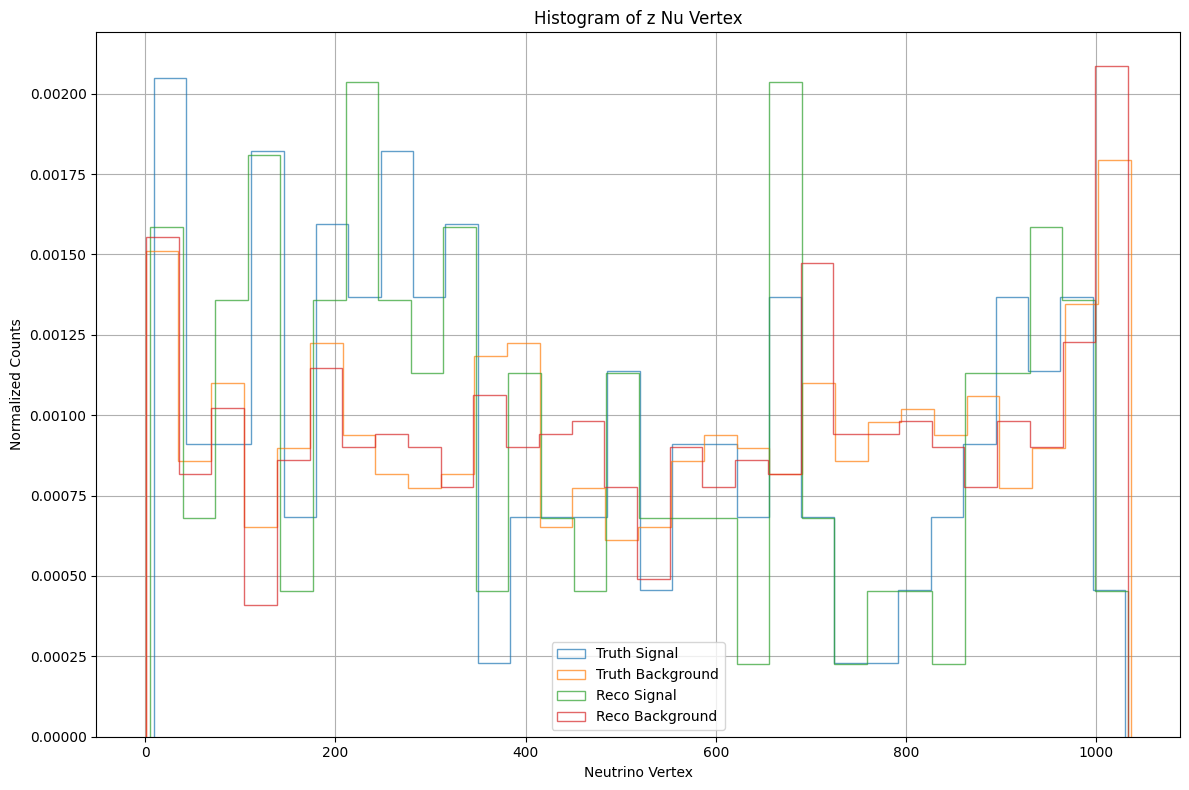

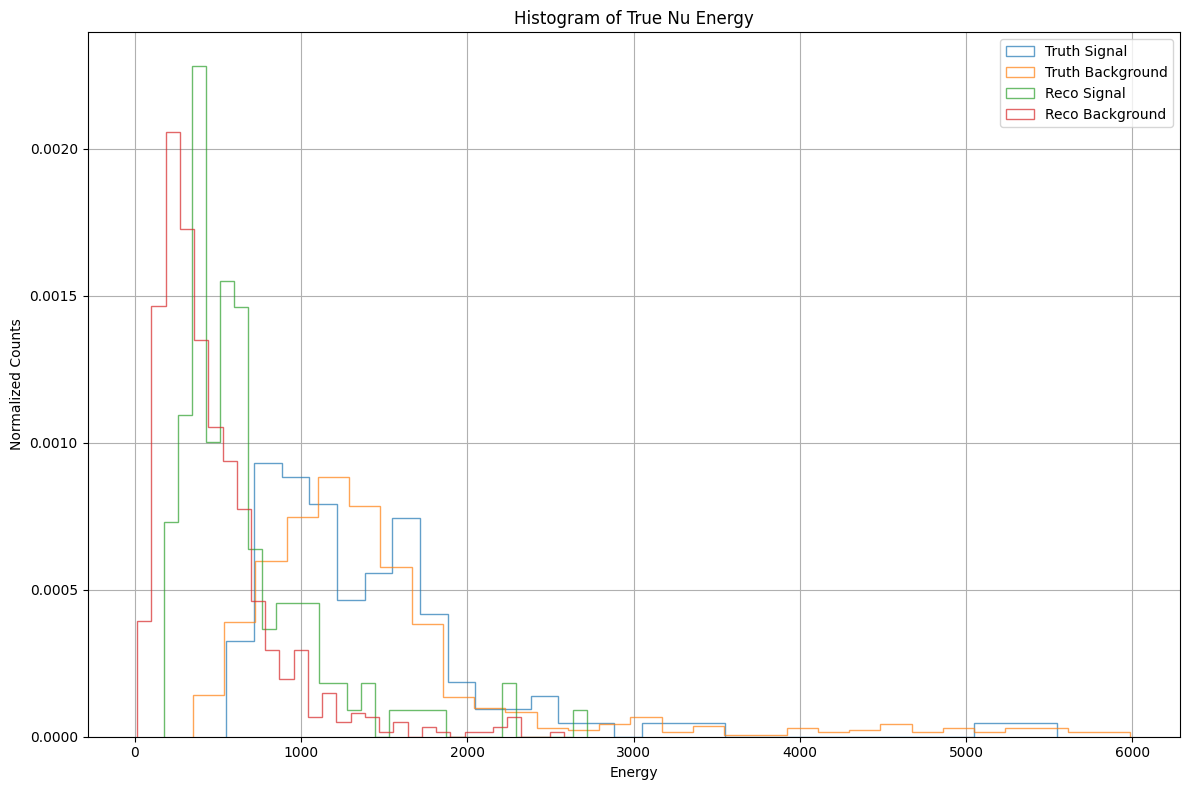

In [ ]:
# above is quite misleading, separate signal and background histograms

# make a hist reco version (this takes the events that are flagged on truth level as signal/background and shows the same histograms on reco level)

reco_energy = wc_df["reco_startMomentum"].to_numpy()

def make_a_hist_reco(truth_variable, reco_variable, title, xaxis):
    
    signal_df = wc_df[wc_df["signal_v1"] == True]
    background_df = wc_df[wc_df["background_v1"] == True]
   
    plt.figure(figsize=(12, 8))
    
    plt.hist(signal_df[truth_variable], bins=30, alpha=0.7, label='Truth Signal', histtype='step', stacked=True, fill=False, density = True)
    plt.hist(background_df[truth_variable], bins=30, alpha=0.7, label='Truth Background', histtype='step', stacked=True, fill=False, density = True)

    plt.hist(signal_df[reco_variable], bins=30, alpha=0.7, label='Reco Signal', histtype='step', stacked=True, fill=False, density = True)
    plt.hist(background_df[reco_variable], bins=30, alpha=0.7, label='Reco Background', histtype='step', stacked=True, fill=False, density = True)
    #plt.hist(wc_df[true_variable], bins=100, alpha=0.7, label='Truth Two Photons', histtype='step', stacked=True, fill=False)
    #plt.hist(correct_df[reco_variable], bins=50, alpha=0.7, label='Correctly Reconstructed', histtype='step', stacked=True, fill=False)
    #plt.hist(incorrect_df[reco_variable], bins=50, alpha=0.7, label='Incorrect Reconstructions', histtype='step', stacked=True, fill=False)
    #plt.hist(outside_tpc_df[reco_variable], bins=50, alpha=0.7, label='Incorrect Reconstructions', histtype='step', stacked=True, fill=False)
    plt.xlabel(xaxis)
    plt.ylabel('Normalized Counts')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


make_a_hist_reco("truth_vtxX", 'reco_nuvtxX', 'Histogram of x Nu Vertex','Truth Neutrino Vertex' )
make_a_hist_reco("truth_vtxY", 'reco_nuvtxY', 'Histogram of y Nu Vertex','Neutrino Vertex' )
make_a_hist_reco("truth_vtxZ", 'reco_nuvtxZ', 'Histogram of z Nu Vertex','Neutrino Vertex' )
make_a_hist_reco("truth_nuEnergy", 'kine_reco_Enu', "Histogram of True Nu Energy", "Energy")
#make_a_hist('truth_energyInside', ???, "Energy Inside", "Energy")
#make_a_hist(None, 'delta_score', 'NC Delta Score Distribution', 'NC Delta Score')
#make_a_hist(None, 'nc_pio_score', 'NC pi0 Score Distribution', 'NC pi0 Score')

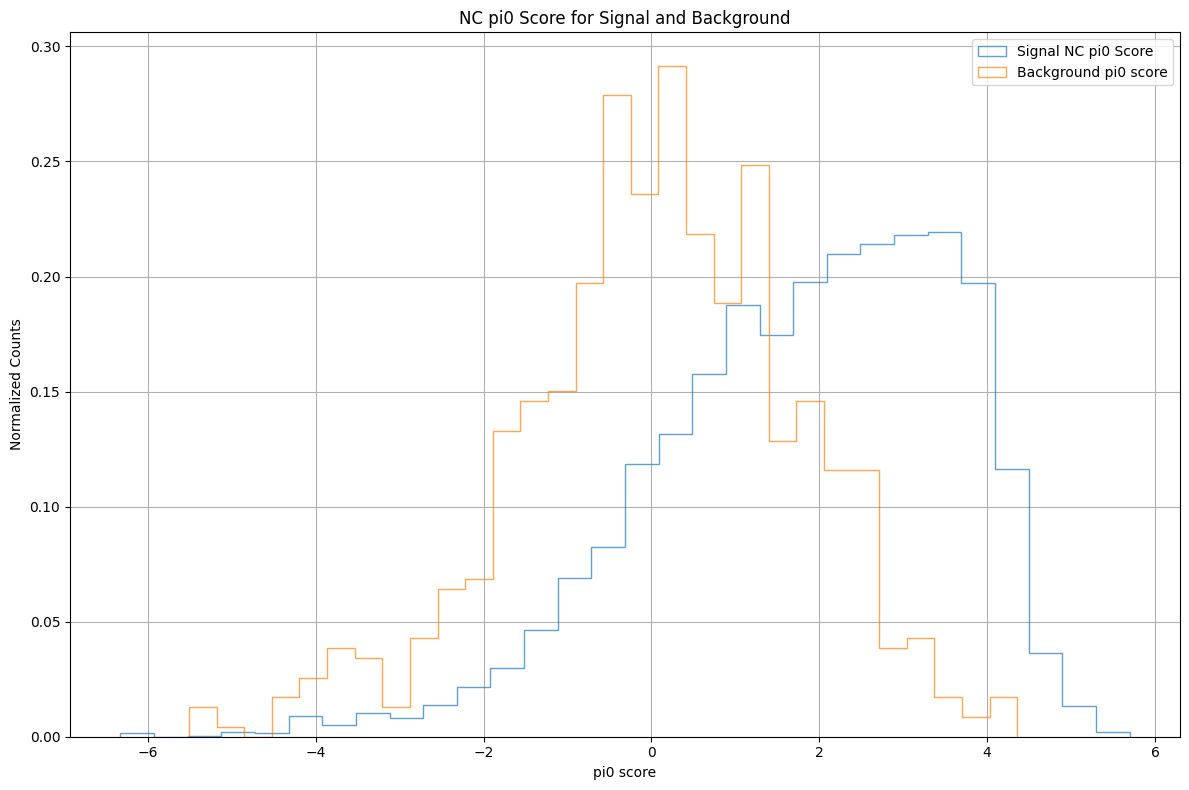

In [ ]:

plt.figure(figsize=(12, 8))

plt.hist(signal_df["nc_pio_score"], bins=30, alpha=0.7, label='Signal NC pi0 Score', histtype='step', stacked=True, fill=False, density = True)
plt.hist(background_df['nc_pio_score'], bins=30, alpha=0.7, label='Background pi0 score', histtype='step', stacked=True, fill=False, density = True)

#plt.hist(signal_df[reco_variable], bins=30, alpha=0.7, label='Reco Signal', histtype='step', stacked=True, fill=False, density = True)
#plt.hist(background_df[reco_variable], bins=30, alpha=0.7, label='Reco Background', histtype='step', stacked=True, fill=False, density = True)
#plt.hist(wc_df[true_variable], bins=100, alpha=0.7, label='Truth Two Photons', histtype='step', stacked=True, fill=False)
#plt.hist(correct_df[reco_variable], bins=50, alpha=0.7, label='Correctly Reconstructed', histtype='step', stacked=True, fill=False)
#plt.hist(incorrect_df[reco_variable], bins=50, alpha=0.7, label='Incorrect Reconstructions', histtype='step', stacked=True, fill=False)
#plt.hist(outside_tpc_df[reco_variable], bins=50, alpha=0.7, label='Incorrect Reconstructions', histtype='step', stacked=True, fill=False)
plt.xlabel('pi0 score')
plt.ylabel('Normalized Counts')
plt.title("NC pi0 Score for Signal and Background")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

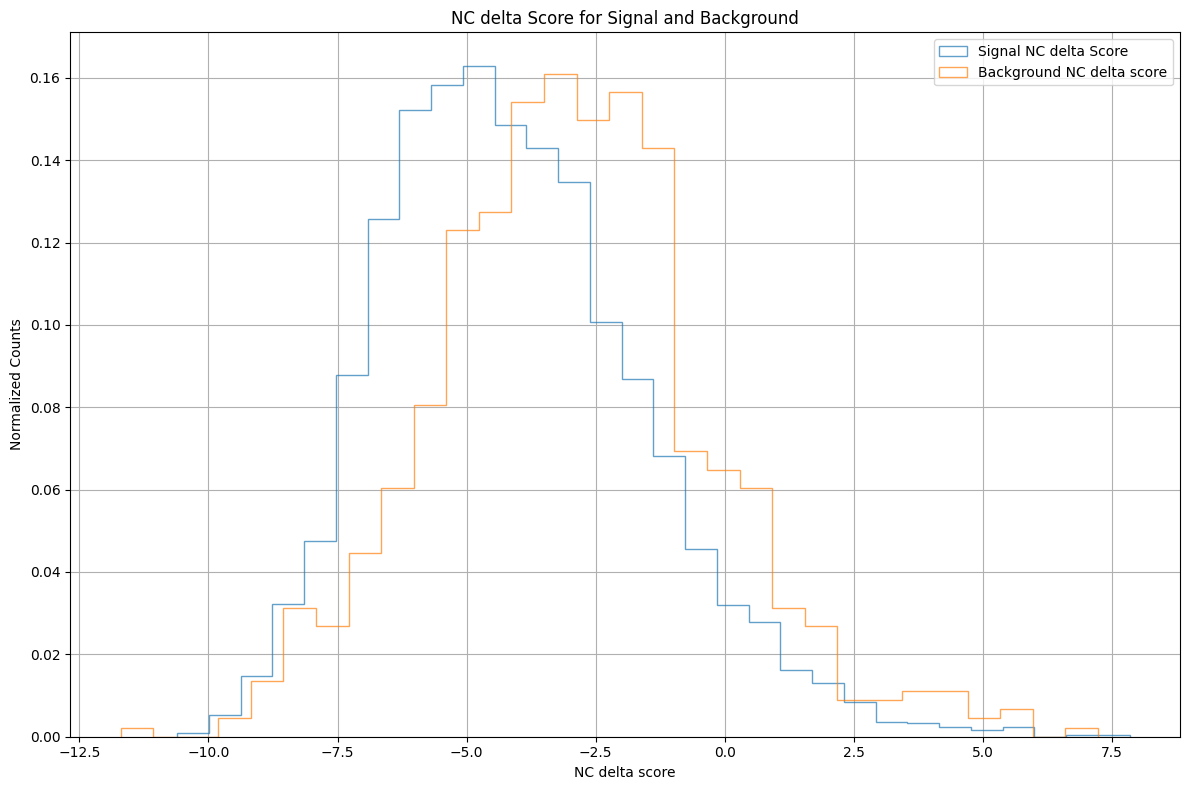

In [ ]:
#signal_df = wc_df[wc_df["signal_v1"] == True]
#background_df = wc_df[wc_df["background_v1"] == True]

plt.figure(figsize=(12, 8))

plt.hist(signal_df["nc_delta_score"], bins=30, alpha=0.7, label='Signal NC delta Score', histtype='step', stacked=True, fill=False, density = True)
plt.hist(background_df['nc_delta_score'], bins=30, alpha=0.7, label='Background NC delta score', histtype='step', stacked=True, fill=False, density = True)

#plt.hist(signal_df[reco_variable], bins=30, alpha=0.7, label='Reco Signal', histtype='step', stacked=True, fill=False, density = True)
#plt.hist(background_df[reco_variable], bins=30, alpha=0.7, label='Reco Background', histtype='step', stacked=True, fill=False, density = True)
#plt.hist(wc_df[true_variable], bins=100, alpha=0.7, label='Truth Two Photons', histtype='step', stacked=True, fill=False)
#plt.hist(correct_df[reco_variable], bins=50, alpha=0.7, label='Correctly Reconstructed', histtype='step', stacked=True, fill=False)
#plt.hist(incorrect_df[reco_variable], bins=50, alpha=0.7, label='Incorrect Reconstructions', histtype='step', stacked=True, fill=False)
#plt.hist(outside_tpc_df[reco_variable], bins=50, alpha=0.7, label='Incorrect Reconstructions', histtype='step', stacked=True, fill=False)

plt.xlabel('NC delta score')
plt.ylabel('Normalized Counts')
plt.title("NC delta Score for Signal and Background")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Comparing for reco num showrs, single photon pi0 score, nc delta score

In [ ]:
# histogram of reco num showers, single_photon_ncpi0_score, nc_delta score - lee's code

signal_df = wc_df[wc_df["signal_v1"] == True]
background_df = wc_df[wc_df["background_v1"] == True]

threshold = "20 MeV threshold"

plt.figure(figsize=(12, 8))

plt.hist(signal_df["shw_sp_n_20mev_showers"], bins=10, range=(0,10), alpha=0.7, label='Signal Num Showers', histtype='step', stacked=True, fill=False, density = True)
plt.hist(background_df['shw_sp_n_20mev_showers'], bins=10, range=(0,10), alpha=0.7, label='Background Num Showers', histtype='step', stacked=True, fill=False, density = True)

plt.xlabel('Number of showers')
plt.ylabel('Normalized Counts')
plt.title(f"Number of showers for Signal and Background with {threshold}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))

plt.hist(signal_df["single_photon_ncpi0_score"], bins=300, alpha=0.7, label='Signal Single Photon NC pi0 Score', histtype='step', stacked=True, fill=False, density = True)
plt.hist(background_df['single_photon_ncpi0_score'], bins=300, alpha=0.7, label='Background Single Photon NC pi0 score', histtype='step', stacked=True, fill=False, density = True)

plt.xlabel('Single photon NC pi0 score')
plt.ylabel('Normalized Counts')
plt.title(f"Single PhotonNC pi0 Score for Signal and Background with {threshold}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))

plt.hist(signal_df["nc_delta_score"], bins=10, alpha=0.7, label='Signal NC delta Score', histtype='step', stacked=True, fill=False, density = True)
plt.hist(background_df['nc_delta_score'], bins=10, alpha=0.7, label='Background NC delta score', histtype='step', stacked=True, fill=False, density = True)

plt.xlabel('NC delta score')
plt.ylabel('Normalized Counts')
plt.title(f"NC delta Score for Signal and Background with {threshold}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'signal_v1'

# investigating single shower pi0 score

100%|██████████| 11935/11935 [00:00<00:00, 37037.27it/s]

7755


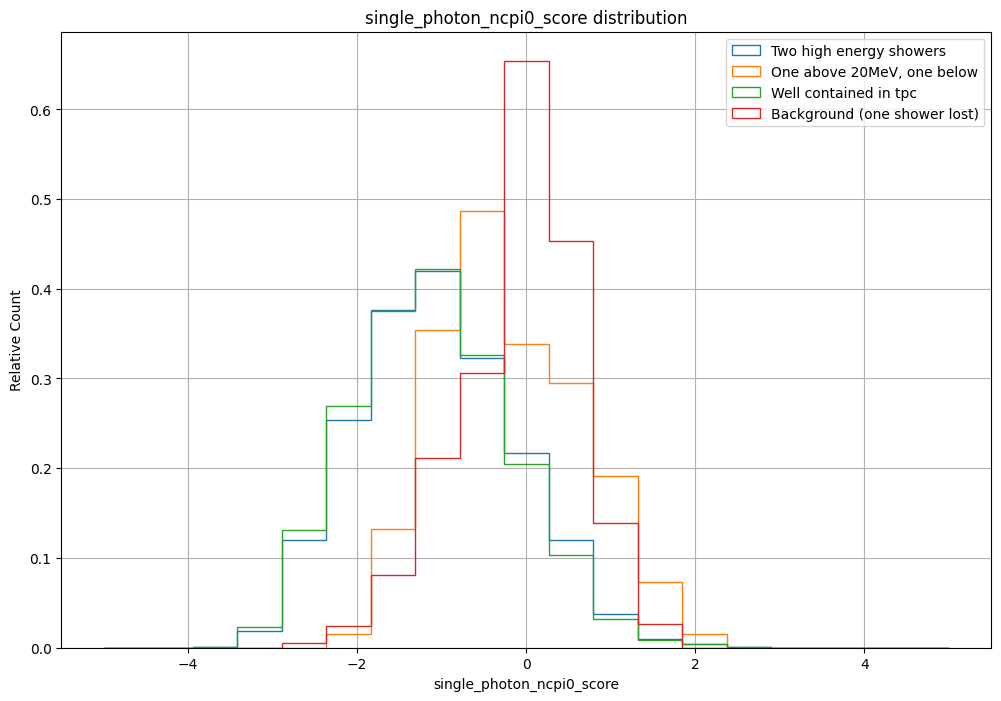

In [ ]:
# histogram of single shower NC pi0 score with different shower energy rqs

# similar to above but just raises flag for signal/background

true_gamma_xs = true_gamma_info_df["true_gamma_pairconversion_xs"].to_numpy()
true_gamma_ys = true_gamma_info_df["true_gamma_pairconversion_ys"].to_numpy()
true_gamma_zs = true_gamma_info_df["true_gamma_pairconversion_zs"].to_numpy()

inside = 0
outside = 0
both = 0

highE_flag = np.full(wc_df.shape[0], False, dtype=bool)
background_flag = np.full(wc_df.shape[0], False, dtype=bool)

truth_particle_vtx_e = wc_df["truth_endXYZT"].to_numpy()
truth_momentum = wc_df["truth_startMomentum"].to_numpy()

truth_pdgs = wc_df["truth_pdg"].to_numpy()
truth_mother = wc_df["truth_mother"].to_numpy()

enu = wc_df["kine_reco_Enu"].to_numpy()

for i in tqdm(range(wc_df.shape[0])):
    
    truth_ids = wc_df["truth_id"].to_numpy()[i]
    
    index_distance_list_truth_s = []
    
    one_outside_tpc = False
    one_inside_tpc = False
    
    one_high_energy = False
    one_low_energy = False
    
    if enu[i] < 0:
        continue
    
    if len(true_gamma_xs[i]) > 0 and len(true_gamma_ys[i]) > 0 and len(true_gamma_zs[i]) > 0:
        xs, ys, zs = true_gamma_xs[i], true_gamma_ys[i], true_gamma_zs[i]

        for x, y, z in zip(xs, ys, zs):
            if not (-1.0 <= x <= 254.3 and -115.0 <= y <= 117.0 and 0.6 <= z <= 1036.4):
                one_outside_tpc = True
            else:
                one_inside_tpc = True
                
    
        
    for j in range(len(truth_particle_vtx_e[i])):
        pdg = truth_pdgs[i][j]
        if pdg == 22:
            mother_index = np.where(truth_ids == truth_mother[i][j])[0]
            if mother_index.size == 0:
                continue
            mother_pdg = truth_pdgs[i][mother_index]
            if np.any(mother_pdg == 111):  
                energy = truth_momentum[i][j][3]
                if energy > .05:
                    one_high_energy = True
                if energy < .02: 
                    one_low_energy = True
    
    if one_high_energy and not one_low_energy and not one_outside_tpc:
        highE_flag[i] = True

print(np.sum(highE_flag))
wc_df['two_shws_above_20mev'] = highE_flag

twoshws_df = wc_df[wc_df["two_shws_above_20mev"] == True]  # two high energy showers
onehigh_onelow_df = wc_df[wc_df['signal_v1'] == True]  # one above 20mev, one below
wellcontained_df = wc_df[wc_df['signal_v2'] == True]  # all contained in tpc
background_df =  wc_df[wc_df['background_v2'] == True]  # one shower lost

plt.figure(figsize=(12, 8))
plt.hist(twoshws_df["single_photon_ncpi0_score"], bins=np.linspace(-5, 5, 20), histtype="step", label="Two high energy showers", density=True)
plt.hist(onehigh_onelow_df["single_photon_ncpi0_score"], bins=np.linspace(-5, 5, 20), histtype="step", label="One above 20MeV, one below", density=True)
plt.hist(wellcontained_df["single_photon_ncpi0_score"], bins=np.linspace(-5, 5, 20), histtype="step", label="Well contained in tpc", density=True)
plt.hist(background_df["single_photon_ncpi0_score"], bins=np.linspace(-5, 5, 20), histtype="step", label="Background (one shower lost)", density=True)
         
plt.xlabel("single_photon_ncpi0_score") 
plt.title("single_photon_ncpi0_score distribution")
plt.ylabel("Relative Count")
plt.legend()
plt.grid(True)
plt.show()

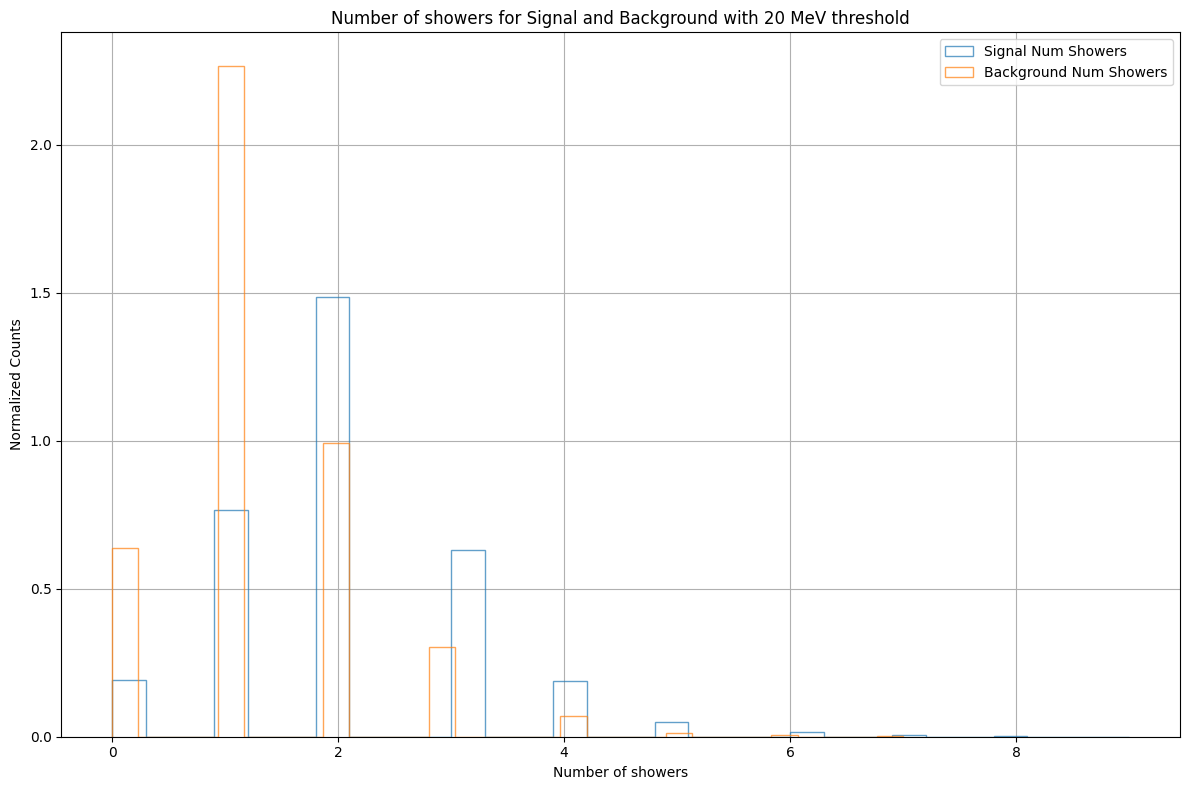

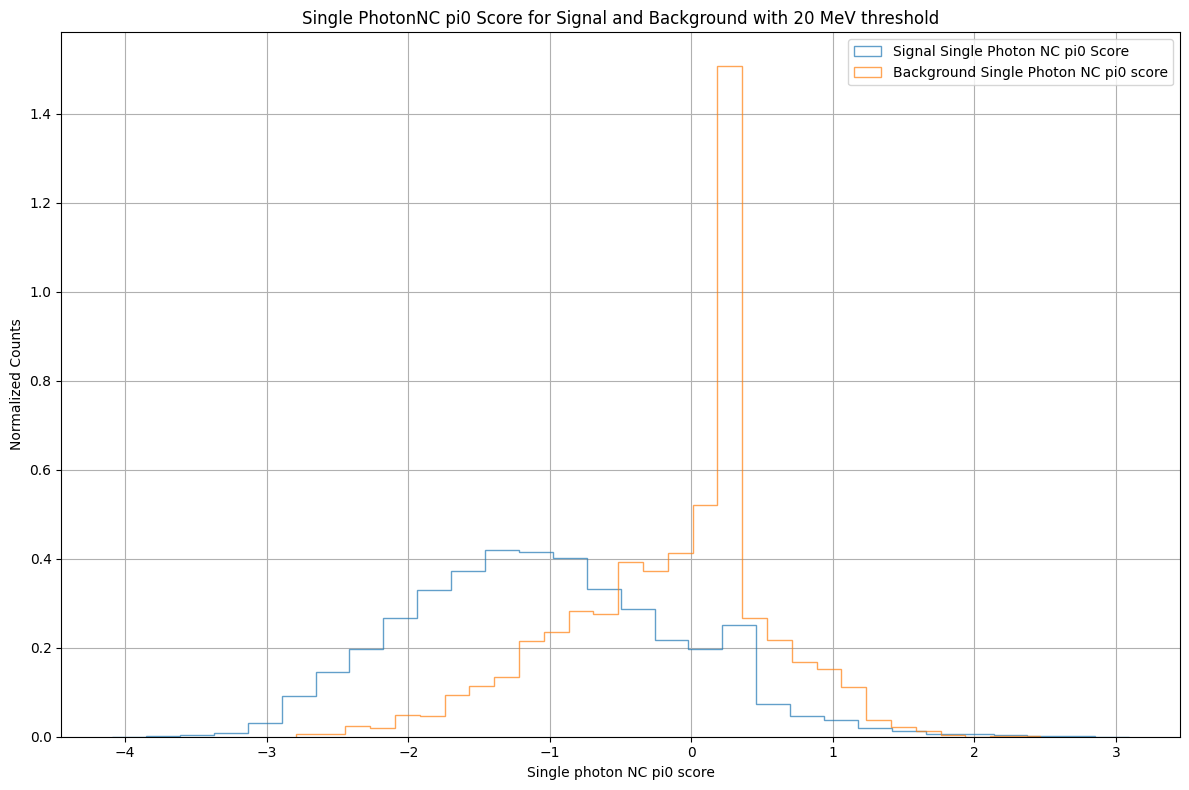

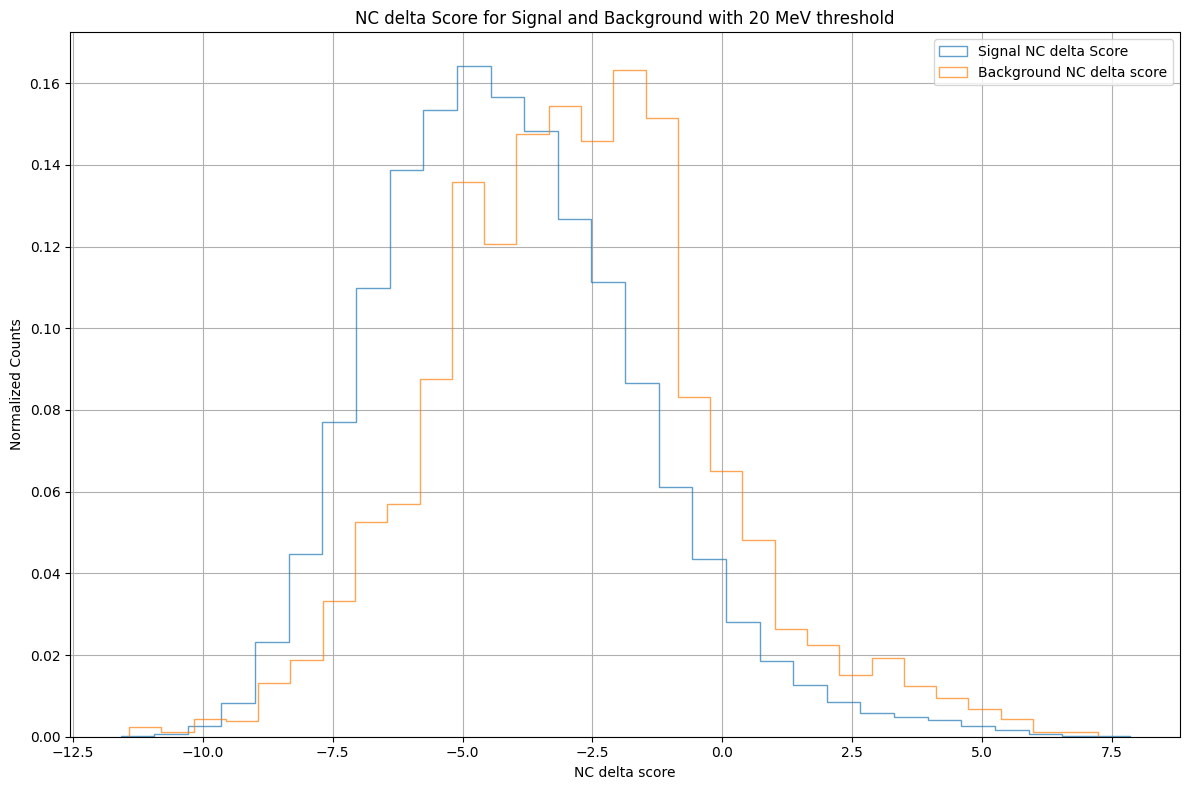

In [ ]:
# same as above, my code 

# histogram of reco num showers, single_photon_ncpi0_score, nc_delta score

signal_df = wc_df[wc_df["signal_v0"] == True]
background_df = wc_df[wc_df["background_v0"] == True]

threshold = "20 MeV threshold"

plt.figure(figsize=(12, 8))

plt.hist(signal_df["shw_sp_n_20mev_showers"], bins=30, alpha=0.7, label='Signal Num Showers', histtype='step', stacked=True, fill=False, density = True)
plt.hist(background_df['shw_sp_n_20mev_showers'], bins=30, alpha=0.7, label='Background Num Showers', histtype='step', stacked=True, fill=False, density = True)

plt.xlabel('Number of showers')
plt.ylabel('Normalized Counts')
plt.title(f"Number of showers for Signal and Background with {threshold}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))

plt.hist(signal_df["single_photon_ncpi0_score"], bins=30, alpha=0.7, label='Signal Single Photon NC pi0 Score', histtype='step', stacked=True, fill=False, density = True)
plt.hist(background_df['single_photon_ncpi0_score'], bins=30, alpha=0.7, label='Background Single Photon NC pi0 score', histtype='step', stacked=True, fill=False, density = True)

plt.xlabel('Single photon NC pi0 score')
plt.ylabel('Normalized Counts')
plt.title(f"Single PhotonNC pi0 Score for Signal and Background with {threshold}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))

plt.hist(signal_df["nc_delta_score"], bins=30, alpha=0.7, label='Signal NC delta Score', histtype='step', stacked=True, fill=False, density = True)
plt.hist(background_df['nc_delta_score'], bins=30, alpha=0.7, label='Background NC delta score', histtype='step', stacked=True, fill=False, density = True)

plt.xlabel('NC delta score')
plt.ylabel('Normalized Counts')
plt.title(f"NC delta Score for Signal and Background with {threshold}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

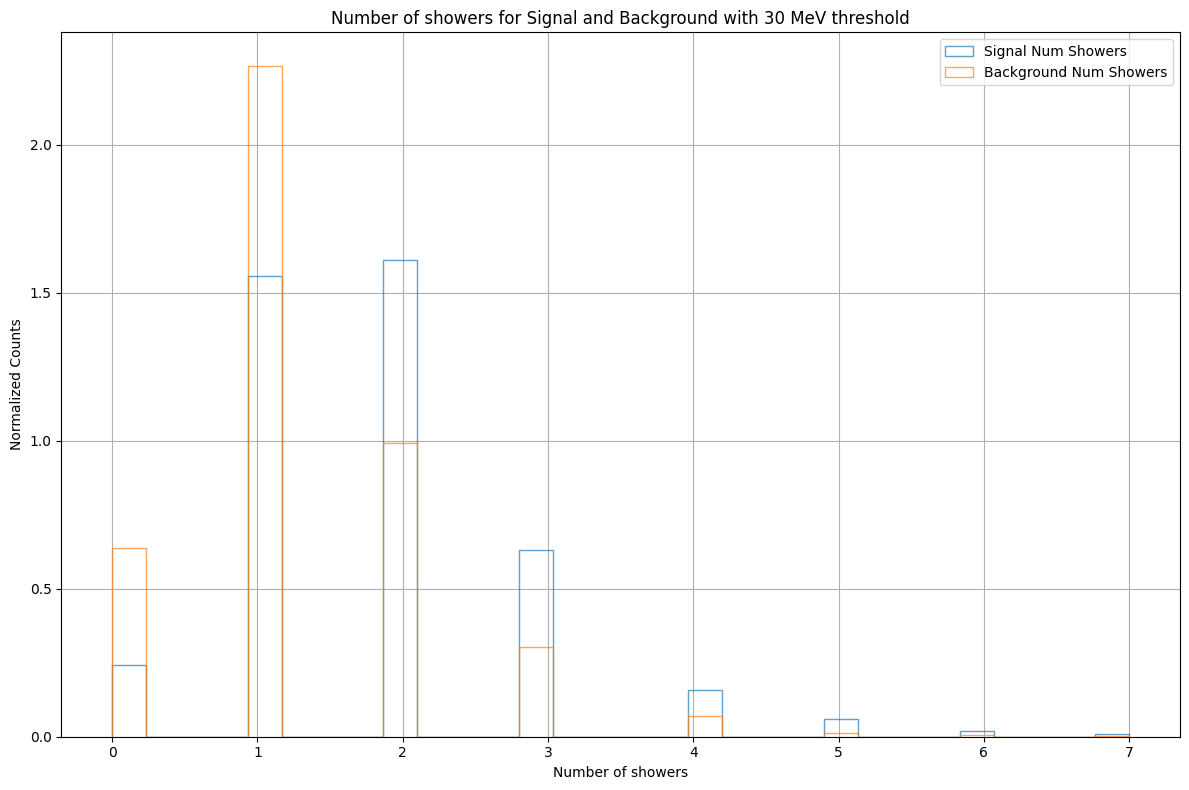

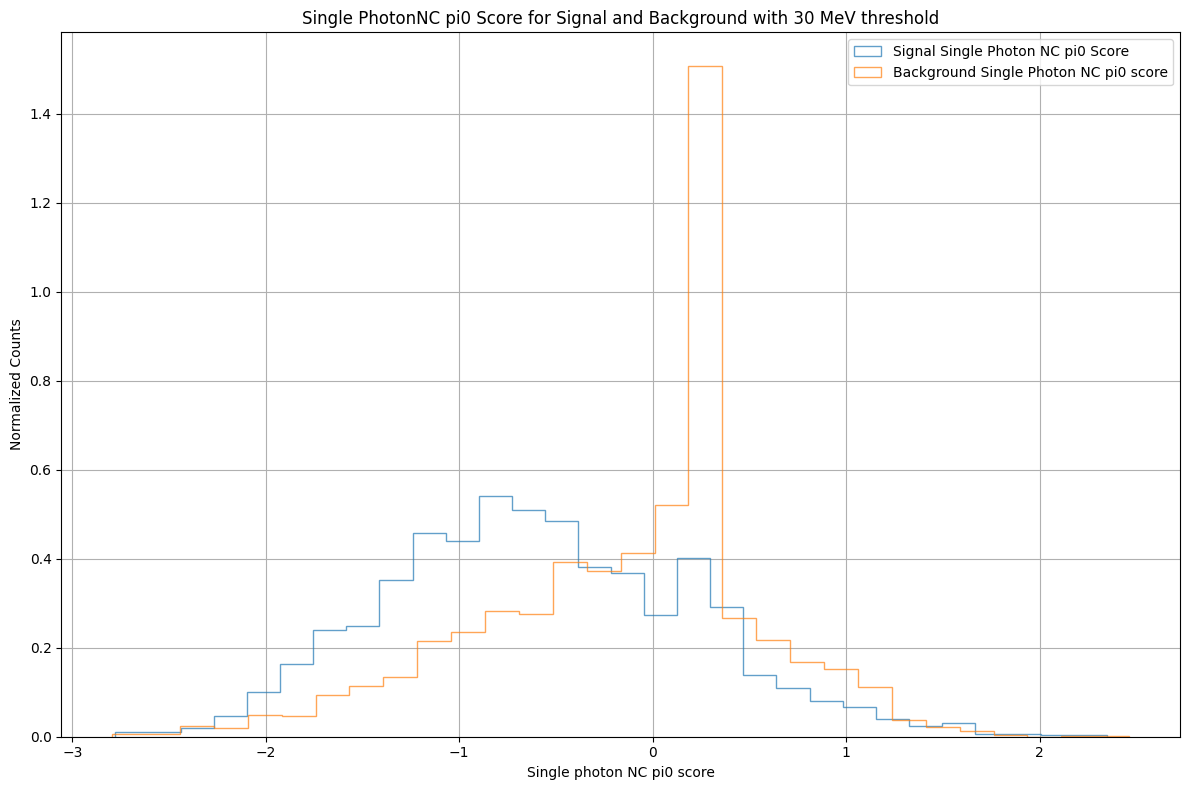

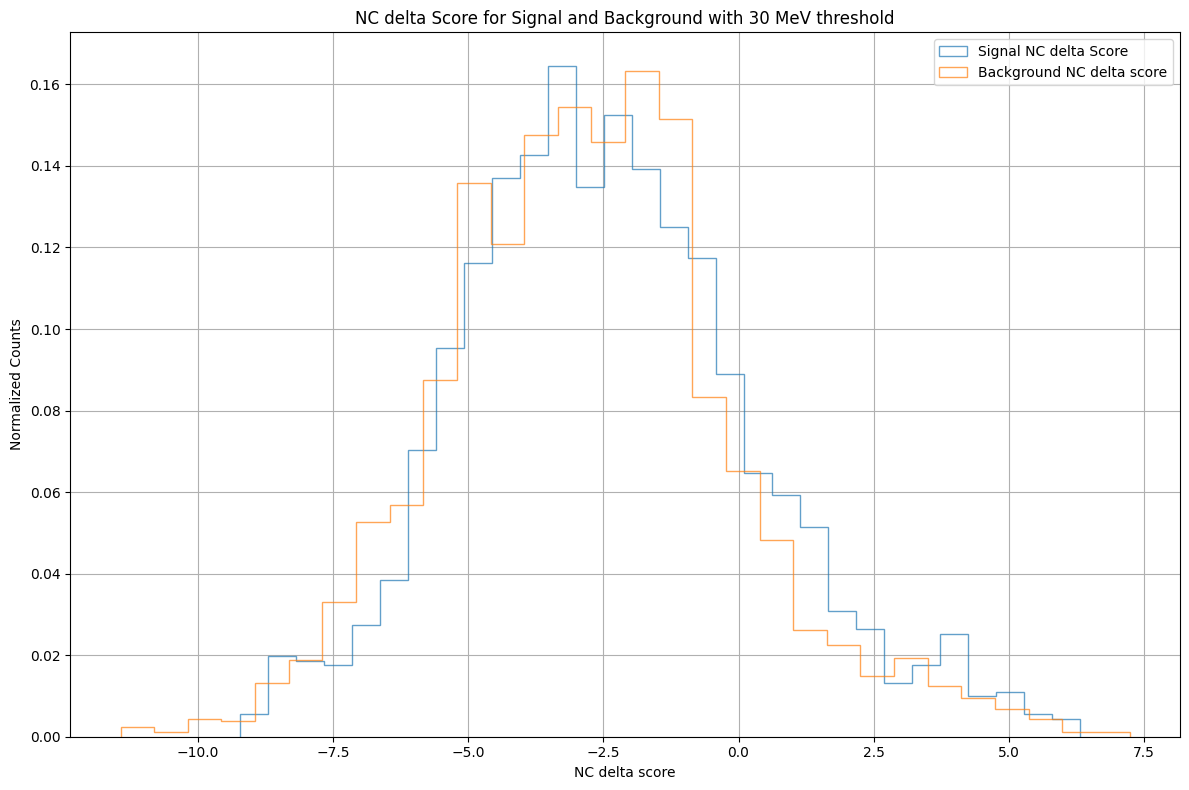

In [ ]:
# 30 mev histogram of reco num showers, single_photon_ncpi0_score, nc_delta score

signal_df = wc_df[wc_df["signal_v1"] == True]
background_df = wc_df[wc_df["background_v1"] == True]

threshold = "30 MeV threshold"

plt.figure(figsize=(12, 8))

plt.hist(signal_df["shw_sp_n_20mev_showers"], bins=30, alpha=0.7, label='Signal Num Showers', histtype='step', stacked=True, fill=False, density = True)
plt.hist(background_df['shw_sp_n_20mev_showers'], bins=30, alpha=0.7, label='Background Num Showers', histtype='step', stacked=True, fill=False, density = True)

plt.xlabel('Number of showers')
plt.ylabel('Normalized Counts')
plt.title(f"Number of showers for Signal and Background with {threshold}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))

plt.hist(signal_df["single_photon_ncpi0_score"], bins=30, alpha=0.7, label='Signal Single Photon NC pi0 Score', histtype='step', stacked=True, fill=False, density = True)
plt.hist(background_df['single_photon_ncpi0_score'], bins=30, alpha=0.7, label='Background Single Photon NC pi0 score', histtype='step', stacked=True, fill=False, density = True)

plt.xlabel('Single photon NC pi0 score')
plt.ylabel('Normalized Counts')
plt.title(f"Single PhotonNC pi0 Score for Signal and Background with {threshold}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))

plt.hist(signal_df["nc_delta_score"], bins=30, alpha=0.7, label='Signal NC delta Score', histtype='step', stacked=True, fill=False, density = True)
plt.hist(background_df['nc_delta_score'], bins=30, alpha=0.7, label='Background NC delta score', histtype='step', stacked=True, fill=False, density = True)

plt.xlabel('NC delta score')
plt.ylabel('Normalized Counts')
plt.title(f"NC delta Score for Signal and Background with {threshold}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

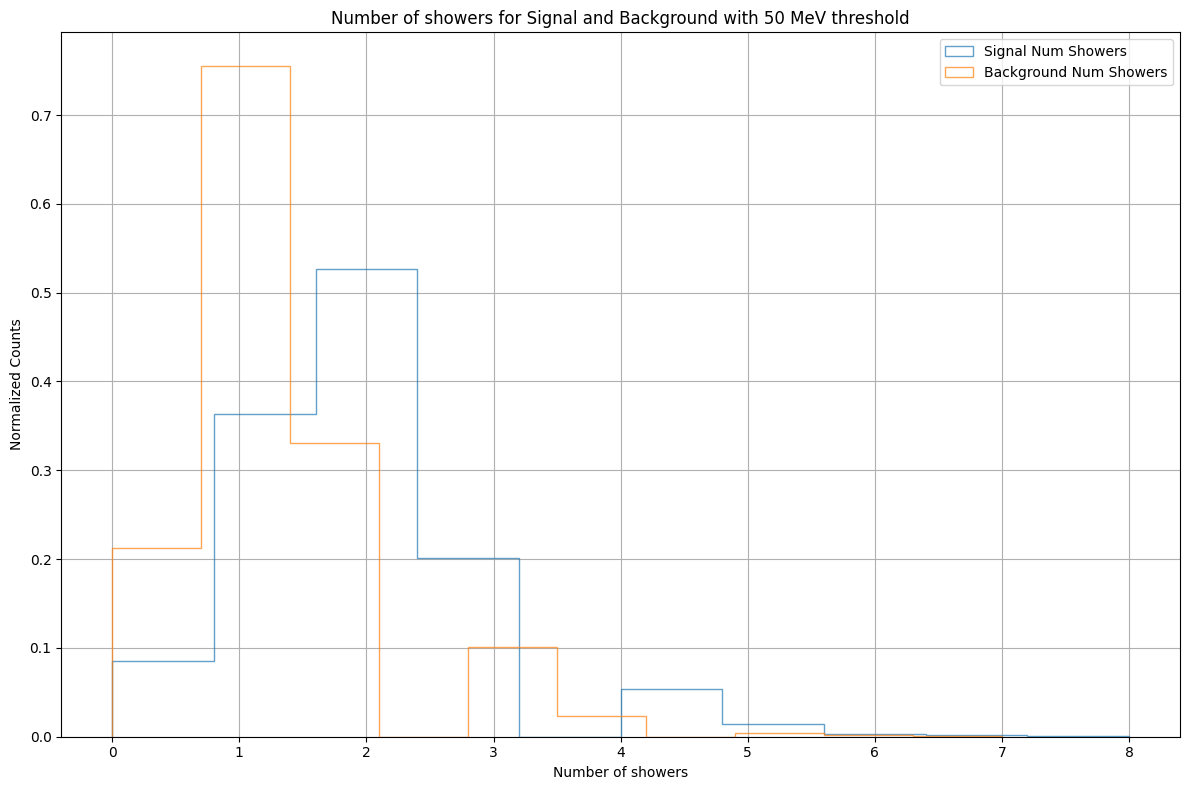

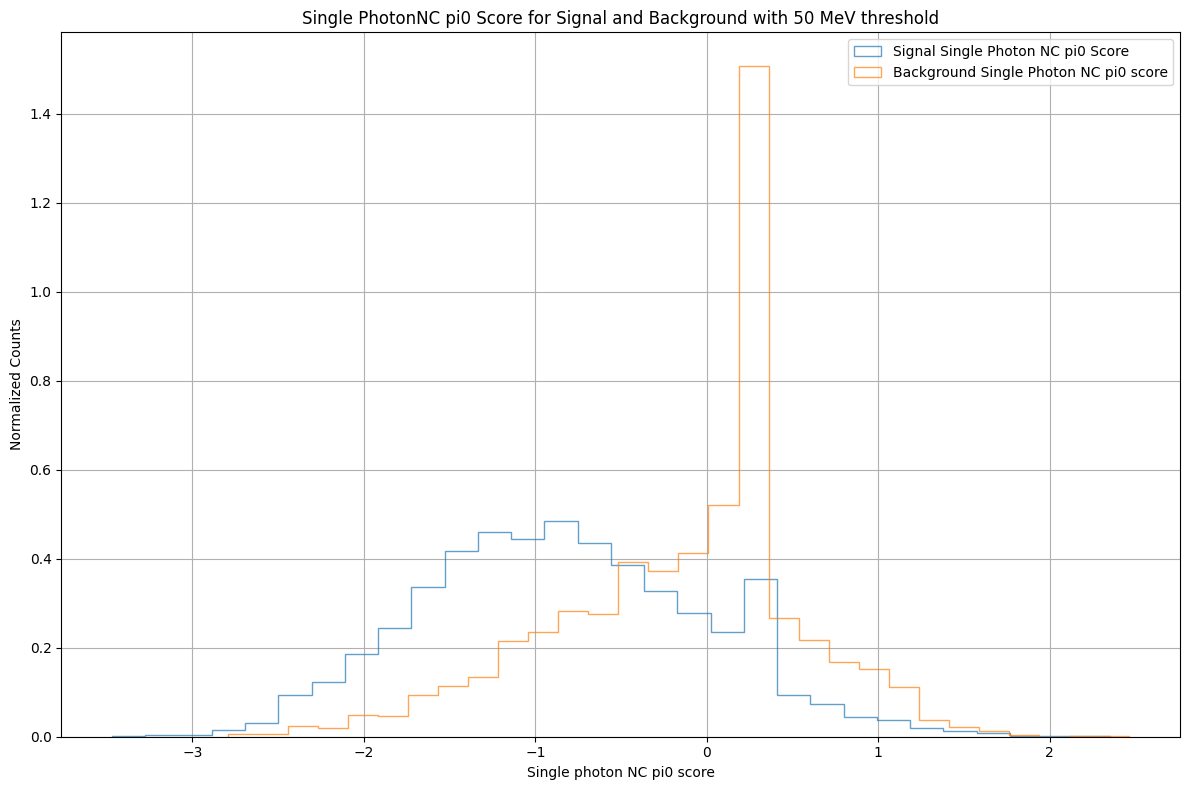

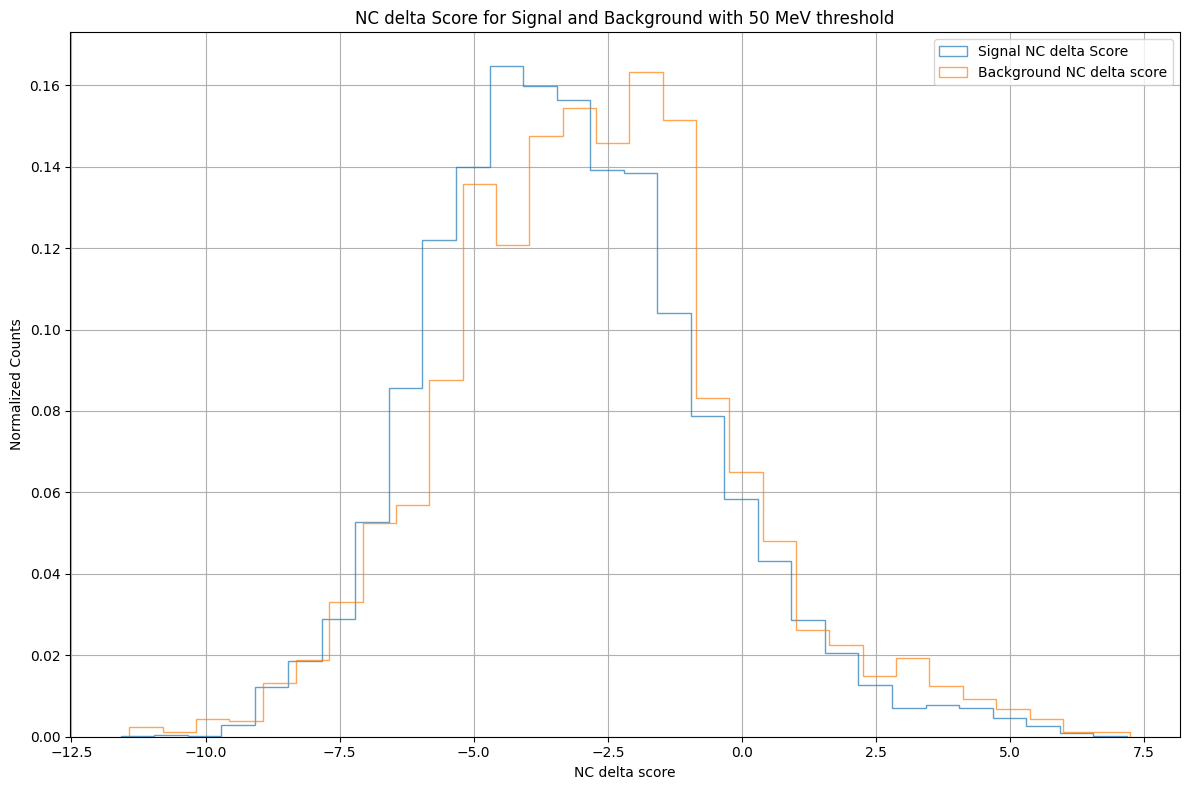

In [ ]:
# histogram of reco num showers, single_photon_ncpi0_score, nc_delta score

signal_df = wc_df[wc_df["signal_v1"] == True]
background_df = wc_df[wc_df["background_v1"] == True]

threshold = "50 MeV threshold"

plt.figure(figsize=(12, 8))

plt.hist(signal_df["shw_sp_n_20mev_showers"], bins=10, alpha=0.7, label='Signal Num Showers', histtype='step', stacked=True, fill=False, density = True)
plt.hist(background_df['shw_sp_n_20mev_showers'], bins=10, alpha=0.7, label='Background Num Showers', histtype='step', stacked=True, fill=False, density = True)

plt.xlabel('Number of showers')
plt.ylabel('Normalized Counts')
plt.title(f"Number of showers for Signal and Background with {threshold}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))

plt.hist(signal_df["single_photon_ncpi0_score"], bins=30, alpha=0.7, label='Signal Single Photon NC pi0 Score', histtype='step', stacked=True, fill=False, density = True)
plt.hist(background_df['single_photon_ncpi0_score'], bins=30, alpha=0.7, label='Background Single Photon NC pi0 score', histtype='step', stacked=True, fill=False, density = True)

plt.xlabel('Single photon NC pi0 score')
plt.ylabel('Normalized Counts')
plt.title(f"Single PhotonNC pi0 Score for Signal and Background with {threshold}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))

plt.hist(signal_df["nc_delta_score"], bins=30, alpha=0.7, label='Signal NC delta Score', histtype='step', stacked=True, fill=False, density = True)
plt.hist(background_df['nc_delta_score'], bins=30, alpha=0.7, label='Background NC delta score', histtype='step', stacked=True, fill=False, density = True)

plt.xlabel('NC delta score')
plt.ylabel('Normalized Counts')
plt.title(f"NC delta Score for Signal and Background with {threshold}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate Efficacy of Signal

In [ ]:
# specifically look for a good threshold where the second photon is not reconstructed by WC

# a histogram of true energy and whether or not the photon was reconstructed

# do momentum and spatial matching

true_gamma_xs = true_gamma_info_df["true_gamma_pairconversion_xs"].to_numpy()
true_gamma_ys = true_gamma_info_df["true_gamma_pairconversion_ys"].to_numpy()
true_gamma_zs = true_gamma_info_df["true_gamma_pairconversion_zs"].to_numpy()
true_gamma_energies = true_gamma_info_df["true_gamma_energies"].to_numpy()

true_start_momentum = true_gamma_info_df["true_momentum_of_original"].to_numpy()

reco_start_momentum = wc_df["reco_startMomentum"].to_numpy()
reco_start_pos = wc_df["reco_endXYZT"].to_numpy()

reco_pdgs = wc_df["reco_pdg"].to_numpy()

enu = wc_df["kine_reco_Enu"].to_numpy()

truth_gammas = []
reco_gammas = []

for i in tqdm(range(wc_df.shape[0])):
    
    if enu[i] < 0:
        continue
    
    # identify true showers

    if len(true_gamma_xs[i]) > 0 and len(true_gamma_ys[i]) > 0 and len(true_gamma_zs[i]) > 0:
        for particle in range(len(true_gamma_xs[i])):
            x, y, z = true_gamma_xs[i][particle], true_gamma_ys[i][particle], true_gamma_zs[i][particle]
            energy = true_gamma_energies[i][particle]
            [t_px, t_py, t_pz] = true_start_momentum[i][particle]
            truth_gammas.append([i, x, y, z, energy, t_px, t_py, t_pz])
            
    # identify reco showers
    
    for j in range(len(reco_pdgs[i])):
            pdg = reco_pdgs[i][j]
            if pdg == 22: # electron 
                reco_x, reco_y, reco_z = reco_start_pos[i][j][0], reco_start_pos[i][j][1], reco_start_pos[i][j][2]
                [r_px, r_py, r_pz, reco_energy] = reco_start_momentum[i][j]
                if reco_energy > 0.05:
                    reco_gammas.append([i, reco_x, reco_y, reco_z, reco_energy, r_px, r_py, r_pz])

columns = ["event_idx", "x", "y", "z", "energy", "px", "py", "pz"]

truth_gamma_df = pd.DataFrame(truth_gammas, columns=columns)
reco_gamma_df = pd.DataFrame(reco_gammas, columns=columns)

event_idx_df = pd.merge(truth_gamma_df, reco_gamma_df, on="event_idx", suffixes=("_truth", "_reco"))

print(event_idx_df.shape)

unique = event_idx_df['event_idx'].unique()



100%|██████████| 42294/42294 [00:00<00:00, 117088.82it/s]


(89396, 15)


In [ ]:
# make the truth_gamma_df store all information about whether close, matched, etc

truth_gamma_df["matched"] = False
truth_gamma_df["close"] = False
truth_gamma_df["aligned"] = False

for event_id in truth_gamma_df["event_idx"].unique():
    # get truth and reco particles from this event
    t_df = truth_gamma_df[truth_gamma_df["event_idx"] == event_id]
    r_df = reco_gamma_df[reco_gamma_df["event_idx"] == event_id]

    if r_df.empty:
        continue

    num_matched = 0
    for t_idx, t_row in t_df.iterrows():
        t_pos = np.array([t_row["x"], t_row["y"], t_row["z"]])
        t_dir = np.array([t_row["px"], t_row["py"], t_row["pz"]])
        t_dir_norm = np.linalg.norm(t_dir)

        # Skip if invalid momentum
        if t_dir_norm == 0:
            continue

        for _, r_row in r_df.iterrows():
            r_pos = np.array([r_row["x"], r_row["y"], r_row["z"]])
            r_dir = np.array([r_row["px"], r_row["py"], r_row["pz"]])
            r_dir_norm = np.linalg.norm(r_dir)

            if r_dir_norm == 0:
                continue

            # distance in cm
            vertex_dist = np.linalg.norm(t_pos - r_pos)

            # dot product over the length is the cosine of the angle between two vectors
            angle = np.arccos(np.dot(t_dir, r_dir) / (t_dir_norm * r_dir_norm))
            #print(angle)
            
            # with these settings ~50% of events truth photons are reconstructed
            if vertex_dist < 6:
                truth_gamma_df.at[t_idx, 'close'] = True
            if angle < np.radians(10):
                truth_gamma_df.at[t_idx, 'aligned'] = True
                
            if vertex_dist < 5 and angle < np.radians(5):
                truth_gamma_df.at[t_idx, "matched"] = True
                num_matched +=1
                break  # stop after first match
            
            
  

In [ ]:
# see statistics of matched, close, etc

truth_matched_flag = truth_gamma_df['matched'].to_numpy() 
truth_energy = truth_gamma_df["energy"].to_numpy()

print(np.radians(10))

print(np.sum(truth_matched_flag))

#print(np.sum(truth_gammas))

#print(len(truth_gammas))

# now make histograms of matched and total to see energy thresholds

matched_df = truth_gamma_df[truth_gamma_df["matched"] == True]
unmatched_df = truth_gamma_df[truth_gamma_df['matched'] == False]

plt.figure(figsize=(12, 8))

plt.hist(matched_df['energy'], bins=50, range=(0,1), alpha=0.7, label='Estimated to be Properly Reconstructed (the vertex is within 5cm AND the heading is within 5 degrees AND has at least 50MeV Energy)', histtype='step', stacked=True, fill=False, density = True)
plt.hist(unmatched_df["energy"], bins=50, range=(0,1), alpha=0.7, label='Estimated to be Improperly Reconstructed (there is no reco photon at that event index that matches those conditions)', histtype='step', stacked=True, fill=False, density = True)

plt.xlabel("True Energy")
plt.ylabel('Normalized Counts')
plt.title("Truth Energy of Particles Based on Success of Reconstruction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# add 20 mev reconstructed energy threshold

NameError: name 'truth_gamma_df' is not defined

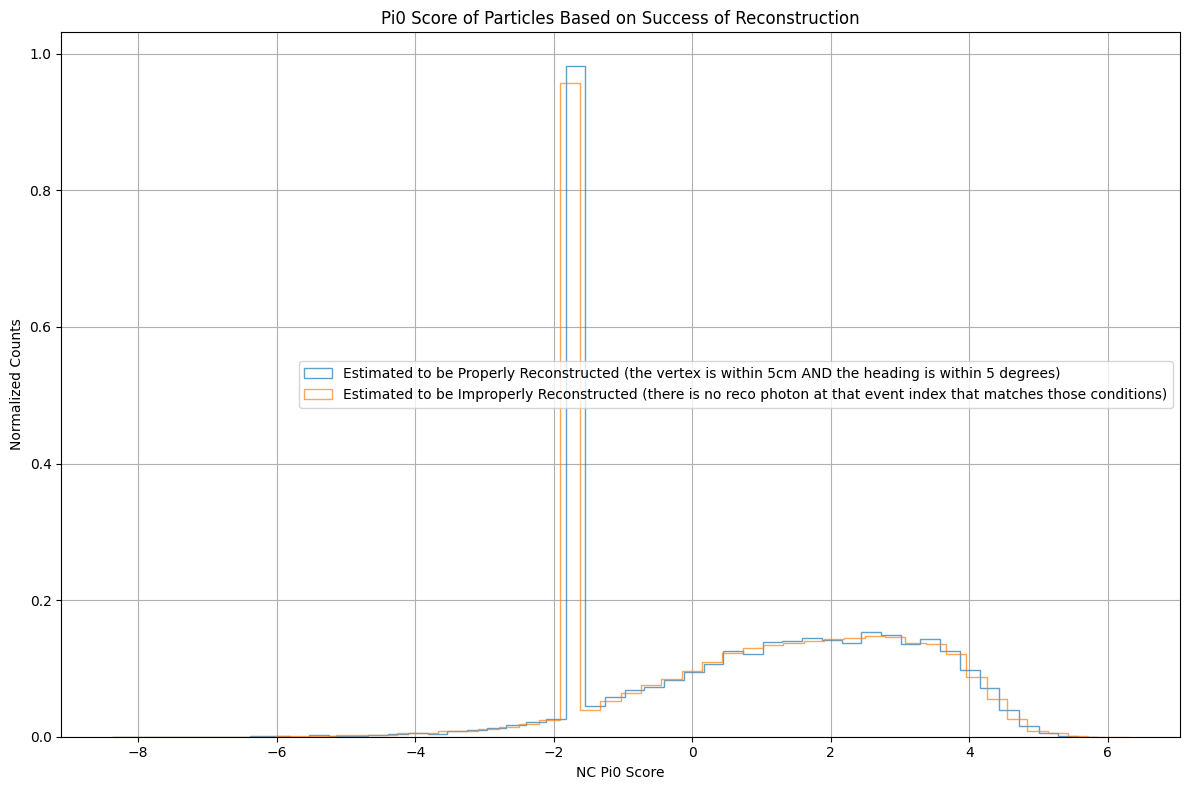

In [ ]:
# now extrapolate to whole df, if one event has two matched photons in truth --> properly reco event

matched_event_indices = truth_gamma_df[truth_gamma_df["matched"]]["event_idx"].unique()
matched_df_whole = wc_df[wc_df["event"].isin(matched_event_indices)]

unmatched_event_indices = truth_gamma_df[truth_gamma_df["matched"] == False]["event_idx"].unique()
unmatched_df_whole = wc_df[wc_df["event"].isin(unmatched_event_indices)]

plt.figure(figsize=(12, 8))

plt.hist(matched_df_whole['nc_pio_score'], bins=50, alpha=0.7, label='Estimated to be Properly Reconstructed (the vertex is within 5cm AND the heading is within 5 degrees)', histtype='step', stacked=True, fill=False, density = True)
plt.hist(unmatched_df_whole["nc_pio_score"], bins=50, alpha=0.7, label='Estimated to be Improperly Reconstructed (there is no reco photon at that event index that matches those conditions)', histtype='step', stacked=True, fill=False, density = True)

plt.xlabel("NC Pi0 Score")
plt.ylabel('Normalized Counts')
plt.title("Pi0 Score of Particles Based on Success of Reconstruction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()